I will begin by importing all the necessary libraires to complete the assignment

In [1]:
#importing all necessary libraries 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# to make the plots display inline 
%matplotlib inline 
import seaborn as sns
import missingno as mno
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split,KFold, StratifiedKFold, cross_validate, GridSearchCV,cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.dummy import DummyClassifier
from sklearn.metrics import RocCurveDisplay

## Task 1

**Load in the Pulsar dataset**

In [2]:
df = pd.read_csv('pulsar_star_19366741.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,109.890625,37.884329,NaN,1.236015,5.056856,30.320199,6.328691,40.149073,0.0
1,111.921875,54.274420,0.199578,-0.613224,3.015050,22.910137,8.415593,73.374067,0.0
2,101.664062,36.017634,0.293837,1.755777,0.806020,9.733102,18.186786,413.300231,0.0
3,176.726562,46.172184,-1.679039,3.382496,141.406354,100.992303,-0.375842,-1.614449,0.0
4,116.101562,42.338266,0.156820,0.386707,1.040134,11.015422,15.352016,287.352167,0.0
...,...,...,...,...,...,...,...,...,...
9995,148.703125,47.881259,-0.441730,0.243384,2.715719,19.514752,8.050228,69.691230,0.0
9996,96.070312,74.560083,0.703671,-0.960082,10.634615,35.096062,3.711222,14.282259,1.0
9997,149.601562,48.679491,-0.380023,0.400959,39.491639,71.821668,1.425310,0.354631,0.0
9998,114.851562,56.819078,0.095027,-0.408383,114.301839,NaN,-1.262985,-0.221406,0.0


In [3]:
df.shape

(10000, 9)

### Clean the column names

In [4]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

These columns have spaces in them and their names are very long so this must be cleaned.

In [5]:
mapper = {' Mean of the integrated profile':'int_profile_mean',
          ' Standard deviation of the integrated profile':'int_profile_std',
          ' Excess kurtosis of the integrated profile':'int_profile_xs_kurt',
          ' Skewness of the integrated profile':'int_profile_skew',
          ' Mean of the DM-SNR curve':'dmsnr_mean',
          ' Standard deviation of the DM-SNR curve':'dmsnr_std',
          ' Excess kurtosis of the DM-SNR curve':'dmsnr_xs_kurt',
          ' Skewness of the DM-SNR curve':'dmsnr_skew',
          'target_class':'target'}

df.rename(columns=mapper,inplace=True)

In [6]:
df.columns

Index(['int_profile_mean', 'int_profile_std', 'int_profile_xs_kurt',
       'int_profile_skew', 'dmsnr_mean', 'dmsnr_std', 'dmsnr_xs_kurt',
       'dmsnr_skew', 'target'],
      dtype='object')

In [7]:
df

,int_profile_mean,int_profile_std,int_profile_xs_kurt,int_profile_skew,dmsnr_mean,dmsnr_std,dmsnr_xs_kurt,dmsnr_skew,target
0,109.890625,37.884329,NaN,1.236015,5.056856,30.320199,6.328691,40.149073,0.0
1,111.921875,54.274420,0.199578,-0.613224,3.015050,22.910137,8.415593,73.374067,0.0
2,101.664062,36.017634,0.293837,1.755777,0.806020,9.733102,18.186786,413.300231,0.0
3,176.726562,46.172184,-1.679039,3.382496,141.406354,100.992303,-0.375842,-1.614449,0.0
4,116.101562,42.338266,0.156820,0.386707,1.040134,11.015422,15.352016,287.352167,0.0
...,...,...,...,...,...,...,...,...,...
9995,148.703125,47.881259,-0.441730,0.243384,2.715719,19.514752,8.050228,69.691230,0.0
9996,96.070312,74.560083,0.703671,-0.960082,10.634615,35.096062,3.711222,14.282259,1.0
9997,149.601562,48.679491,-0.380023,0.400959,39.491639,71.821668,1.425310,0.354631,0.0
9998,114.851562,56.819078,0.095027,-0.408383,114.301839,NaN,-1.262985,-0.221406,0.0


### Check the cardinality of columns

In [8]:
#checking how many unique values are in each column
df.nunique()

int_profile_mean        6325
int_profile_std         9985
int_profile_xs_kurt     8623
int_profile_skew       10000
dmsnr_mean              6203
dmsnr_std               9059
dmsnr_xs_kurt          10000
dmsnr_skew              9504
target                     2
dtype: int64

In [9]:
#checking for duplicate rows
duplicateRows = df[df.duplicated(keep='last')]

In [10]:
duplicateRows

,int_profile_mean,int_profile_std,int_profile_xs_kurt,int_profile_skew,dmsnr_mean,dmsnr_std,dmsnr_xs_kurt,dmsnr_skew,target


The dataset has no duplicate rows.

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
int_profile_mean,10000.0,111.040923,25.464399,6.187500,100.888672,114.980469,126.953125,185.257812
int_profile_std,10000.0,46.491370,6.778196,24.772042,42.312413,46.907553,50.877933,91.206475
int_profile_xs_kurt,8623.0,0.471905,1.041487,-1.738021,0.025633,0.226084,0.475628,8.069522
int_profile_skew,10000.0,1.738290,6.056122,-1.791886,-0.184345,0.209748,0.936605,68.101622
dmsnr_mean,10000.0,12.373879,28.990069,0.213211,1.904682,2.786789,5.313963,222.421405
dmsnr_std,9059.0,26.160619,19.424510,7.370432,14.421916,18.377255,27.986738,110.642211
dmsnr_xs_kurt,10000.0,8.352283,4.491612,-3.139270,5.861264,8.464160,10.731775,34.539844
dmsnr_skew,9504.0,105.377110,105.436376,-1.976976,36.117591,83.290727,140.010170,1191.000837
target,10000.0,0.089700,0.285766,0.000000,0.000000,0.000000,0.000000,1.000000


In [12]:
df.dtypes

int_profile_mean       float64
int_profile_std        float64
int_profile_xs_kurt    float64
int_profile_skew       float64
dmsnr_mean             float64
dmsnr_std              float64
dmsnr_xs_kurt          float64
dmsnr_skew             float64
target                 float64
dtype: object

#### Outliers

In [13]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
outliers.count()

int_profile_mean        561
int_profile_std         145
int_profile_xs_kurt     760
int_profile_skew       1061
dmsnr_mean             1612
dmsnr_std              1207
dmsnr_xs_kurt           286
dmsnr_skew              488
target                  897
dtype: int64

As there are only 2 possible target outputs, we can convert the target column to categorical data.

In [14]:
df["target"] = df["target"].astype("int64")
df["target"] = df["target"].astype("category")
df.dtypes

int_profile_mean        float64
int_profile_std         float64
int_profile_xs_kurt     float64
int_profile_skew        float64
dmsnr_mean              float64
dmsnr_std               float64
dmsnr_xs_kurt           float64
dmsnr_skew              float64
target                 category
dtype: object

#### Missing Values

<AxesSubplot:>

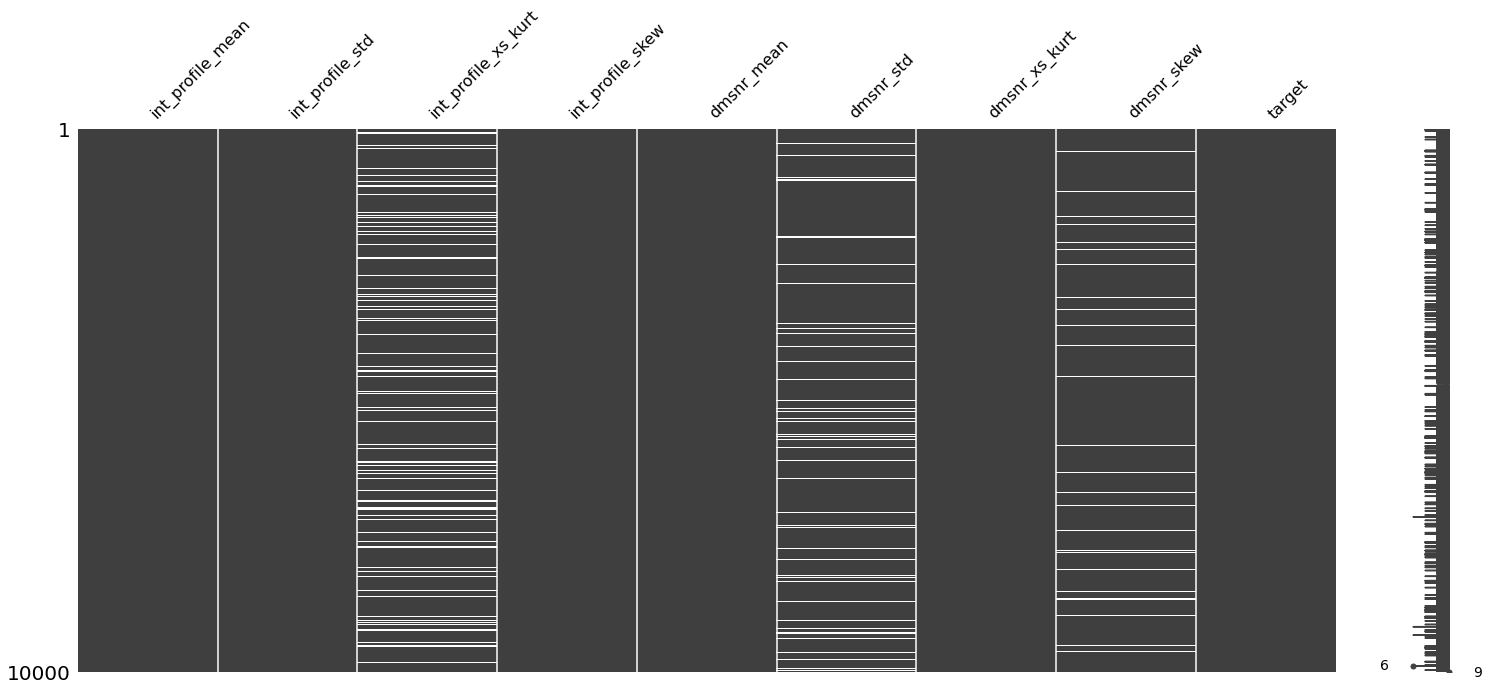

In [15]:
mno.matrix(df)

We can see that our data does contain missing values from this visual representation. Let's now see how many actual missing values are in the dataset.

In [16]:
#find the sum of null values in the dataset
df.isnull().sum()

int_profile_mean          0
int_profile_std           0
int_profile_xs_kurt    1377
int_profile_skew          0
dmsnr_mean                0
dmsnr_std               941
dmsnr_xs_kurt             0
dmsnr_skew              496
target                    0
dtype: int64

Let's look at the percentage of missing values in the dataset.

In [17]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percent_missing(%)': percent_missing})
missing_value_df

,percent_missing(%)
int_profile_mean,0.00
int_profile_std,0.00
int_profile_xs_kurt,13.77
int_profile_skew,0.00
dmsnr_mean,0.00
dmsnr_std,9.41
dmsnr_xs_kurt,0.00
dmsnr_skew,4.96
target,0.00


We see here that the majority of the data doesn't contain any null/missing values. However there are a significant number of missing values in the columns; Excess kurtosis of the integrated profile(13.7%), Standard deviation of the DM-SNR curve(9.41%) and the skewness of the DM-SNR curve(4.96%).

In [18]:
print("The number of missing values in the whole dataset is {0}".format(df.isnull().sum().sum()))

The number of missing values in the whole dataset is 2814


There are 10,000 observations in our dataset. There are 2814 containing missing values so if i was to remove all the missing values in the dataset, this will result in a 28.14% loss in rows in the dataset.

This is too high of a percentage to be lost so removing rows conataining is not the best option here. So, we need another way to fill in these missing values.

I will look at how the various variables in the dataset are correlated in order to determine the best way to fill these missing values in my dataset.

In [19]:
corr_matrix = df.corr()
corr_matrix

,int_profile_mean,int_profile_std,int_profile_xs_kurt,int_profile_skew,dmsnr_mean,dmsnr_std,dmsnr_xs_kurt,dmsnr_skew
int_profile_mean,1.000000,0.548307,-0.870803,-0.735106,-0.296020,-0.307461,0.233707,0.147145
int_profile_std,0.548307,1.000000,-0.522732,-0.536858,0.000401,-0.048315,0.022784,0.019211
int_profile_xs_kurt,-0.870803,-0.522732,1.000000,0.943628,0.420219,0.436129,-0.340042,-0.215114
int_profile_skew,-0.735106,-0.536858,0.943628,1.000000,0.415665,0.419499,-0.327585,-0.203514
dmsnr_mean,-0.296020,0.000401,0.420219,0.415665,1.000000,0.795324,-0.616250,-0.357067
dmsnr_std,-0.307461,-0.048315,0.436129,0.419499,0.795324,1.000000,-0.808536,-0.580045
dmsnr_xs_kurt,0.233707,0.022784,-0.340042,-0.327585,-0.616250,-0.808536,1.000000,0.925743
dmsnr_skew,0.147145,0.019211,-0.215114,-0.203514,-0.357067,-0.580045,0.925743,1.000000


In [20]:
#data frame to view the integrated profile stats from main dataframe
df_int = df[["int_profile_mean","int_profile_std","int_profile_xs_kurt","int_profile_skew","target"]].copy()
df_int

,int_profile_mean,int_profile_std,int_profile_xs_kurt,int_profile_skew,target
0,109.890625,37.884329,NaN,1.236015,0
1,111.921875,54.274420,0.199578,-0.613224,0
2,101.664062,36.017634,0.293837,1.755777,0
3,176.726562,46.172184,-1.679039,3.382496,0
4,116.101562,42.338266,0.156820,0.386707,0
...,...,...,...,...,...
9995,148.703125,47.881259,-0.441730,0.243384,0
9996,96.070312,74.560083,0.703671,-0.960082,1
9997,149.601562,48.679491,-0.380023,0.400959,0
9998,114.851562,56.819078,0.095027,-0.408383,0


In [21]:
corr_mat = df_int.corr()
corr_mat

,int_profile_mean,int_profile_std,int_profile_xs_kurt,int_profile_skew
int_profile_mean,1.000000,0.548307,-0.870803,-0.735106
int_profile_std,0.548307,1.000000,-0.522732,-0.536858
int_profile_xs_kurt,-0.870803,-0.522732,1.000000,0.943628
int_profile_skew,-0.735106,-0.536858,0.943628,1.000000


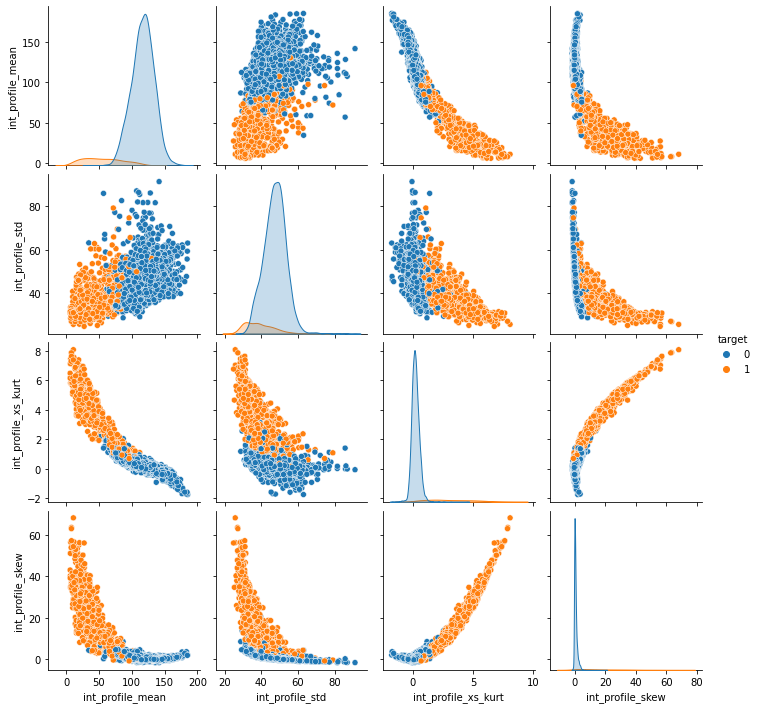

In [22]:
sns.pairplot(df_int, hue='target')

In [23]:
#data frame for dmsnr curve faeature 
df_dmsnr = df[["dmsnr_mean","dmsnr_std","dmsnr_xs_kurt","dmsnr_skew","target"]].copy()
df_dmsnr

,dmsnr_mean,dmsnr_std,dmsnr_xs_kurt,dmsnr_skew,target
0,5.056856,30.320199,6.328691,40.149073,0
1,3.015050,22.910137,8.415593,73.374067,0
2,0.806020,9.733102,18.186786,413.300231,0
3,141.406354,100.992303,-0.375842,-1.614449,0
4,1.040134,11.015422,15.352016,287.352167,0
...,...,...,...,...,...
9995,2.715719,19.514752,8.050228,69.691230,0
9996,10.634615,35.096062,3.711222,14.282259,1
9997,39.491639,71.821668,1.425310,0.354631,0
9998,114.301839,NaN,-1.262985,-0.221406,0


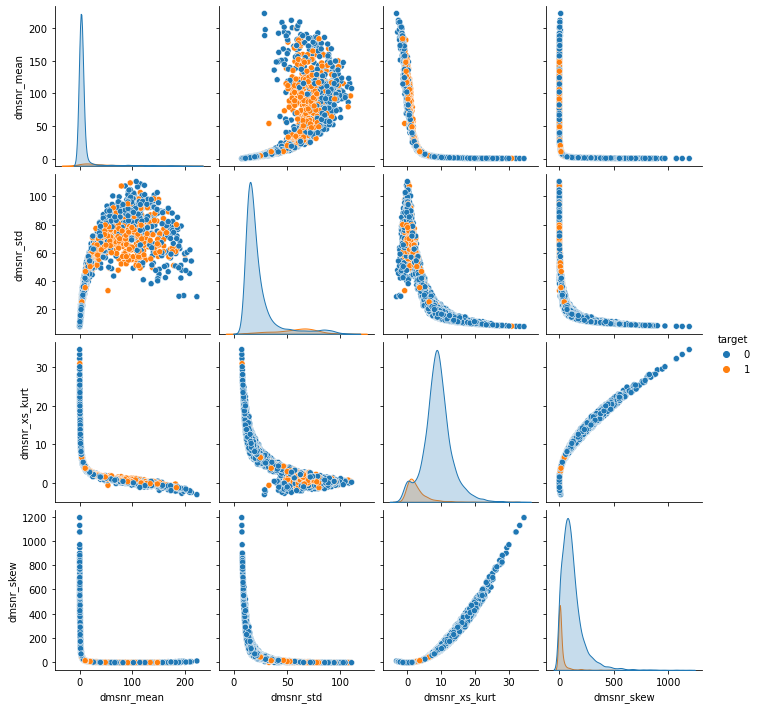

In [24]:
sns.pairplot(df_dmsnr, hue='target')

In [25]:
corr_mat1 = df_dmsnr.corr()
corr_mat1

,dmsnr_mean,dmsnr_std,dmsnr_xs_kurt,dmsnr_skew
dmsnr_mean,1.000000,0.795324,-0.616250,-0.357067
dmsnr_std,0.795324,1.000000,-0.808536,-0.580045
dmsnr_xs_kurt,-0.616250,-0.808536,1.000000,0.925743
dmsnr_skew,-0.357067,-0.580045,0.925743,1.000000


Looking at the pair plot of the integrated profile and the dmsnr curve, we see that there's a clear non-linear relationship(negative correlation) between mean and kurtosis and mean and skewness.

We can also see there's a similar negative correlation between standard deviation and kurtosis and standard deviation and skewness, although the trends are slightly noisier. 

There's also a clear relationship between skewness and kurtosis.

Based on how this data is correlated, I think the best approach to fill the missing values in the dataset is to use linear regression imputation.

In [26]:
#linear regression imputation for int_profile_xs_kurt
##take all the columns that don' contain null values 
data = df[["int_profile_mean","int_profile_std","int_profile_xs_kurt","int_profile_skew","dmsnr_mean","dmsnr_xs_kurt","target"]].copy()
#create the test data by removing the column with the null values
test_data = data[df["int_profile_xs_kurt"].isnull()].copy()
data.dropna(inplace=True)
#training data created with the value that we want to perform the linear regression imputation on
y_train = data["int_profile_xs_kurt"].copy()
#drop the column from the training and test data 
x_train = data.drop("int_profile_xs_kurt",axis=1)
x_test = test_data.drop("int_profile_xs_kurt",axis=1)

#perform the linear regression
model = LinearRegression()
model.fit(x_train, y_train)
##get the predicted values 
y_pred = model.predict(x_test)


In [27]:
y_pred

array([ 0.32671841, -0.13577067,  0.22747351, ...,  0.20293062,
        0.12042306,  0.1103061 ])

Now that I have predicted values for int_profile_xs_kurt, I now need to impute them into their related postions in the dataframe where the null values are.

In [28]:
i=0 
##replace the null values with the predicted values based on the linear regression imputation 
for column in range(df.shape[0]):
    if np.isnan(df["int_profile_xs_kurt"][column]):
        df["int_profile_xs_kurt"][column] = y_pred[i]
        i+=1

C:\Users\Edmond Agbaje\AppData\Local\Temp\ipykernel_8960\2397602781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["int_profile_xs_kurt"][column] = y_pred[i]


In [29]:
df.isnull().sum()

int_profile_mean         0
int_profile_std          0
int_profile_xs_kurt      0
int_profile_skew         0
dmsnr_mean               0
dmsnr_std              941
dmsnr_xs_kurt            0
dmsnr_skew             496
target                   0
dtype: int64

We can now see that int_profile_xs_kurt has no missing values anymore so we have successfully used linear regression imputation to replace these missing values. I will now do the same for dmsnr_std and dmsnr_skew columns to replace the missing values there too. 

In [30]:
#dmsnr_std

data1 = df[["int_profile_mean","int_profile_std","int_profile_xs_kurt","int_profile_skew","dmsnr_mean","dmsnr_std","dmsnr_xs_kurt","target"]].copy()

test_data1 = data1[df["dmsnr_std"].isnull()].copy()
data1.dropna(inplace=True)

y_train1 = data1["dmsnr_std"].copy()

x_train1 = data1.drop("dmsnr_std",axis=1)
x_test1 = test_data1.drop("dmsnr_std",axis=1)

model1 = LinearRegression()
model1.fit(x_train1, y_train1)

y_pred1 = model1.predict(x_test1)


In [31]:
i=0 

for column in range(df.shape[0]):
    if np.isnan(df["dmsnr_std"][column]):
        df["dmsnr_std"][column] = y_pred1[i]
        i+=1

C:\Users\Edmond Agbaje\AppData\Local\Temp\ipykernel_8960\3923695004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dmsnr_std"][column] = y_pred1[i]


In [32]:
df.isnull().sum()

int_profile_mean         0
int_profile_std          0
int_profile_xs_kurt      0
int_profile_skew         0
dmsnr_mean               0
dmsnr_std                0
dmsnr_xs_kurt            0
dmsnr_skew             496
target                   0
dtype: int64

In [33]:
#dmsnr_skew
data2 = df[["int_profile_mean","int_profile_std","int_profile_xs_kurt","int_profile_skew","dmsnr_mean","dmsnr_std","dmsnr_xs_kurt","dmsnr_skew","target"]].copy()

test_data2 = data2[df["dmsnr_skew"].isnull()].copy()
data2.dropna(inplace=True)

y_train2 = data2["dmsnr_skew"].copy()

x_train2 = data2.drop("dmsnr_skew",axis=1)
x_test2 = test_data2.drop("dmsnr_skew",axis=1)

model2 = LinearRegression()
model2.fit(x_train2, y_train2)

y_pred2 = model2.predict(x_test2)


In [34]:
i=0 

for column in range(df.shape[0]):
    if np.isnan(df["dmsnr_skew"][column]):
        df["dmsnr_skew"][column] = y_pred2[i]
        i+=1

C:\Users\Edmond Agbaje\AppData\Local\Temp\ipykernel_8960\612081005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dmsnr_skew"][column] = y_pred2[i]


In [35]:
df.isnull().sum()

int_profile_mean       0
int_profile_std        0
int_profile_xs_kurt    0
int_profile_skew       0
dmsnr_mean             0
dmsnr_std              0
dmsnr_xs_kurt          0
dmsnr_skew             0
target                 0
dtype: int64

<AxesSubplot:>

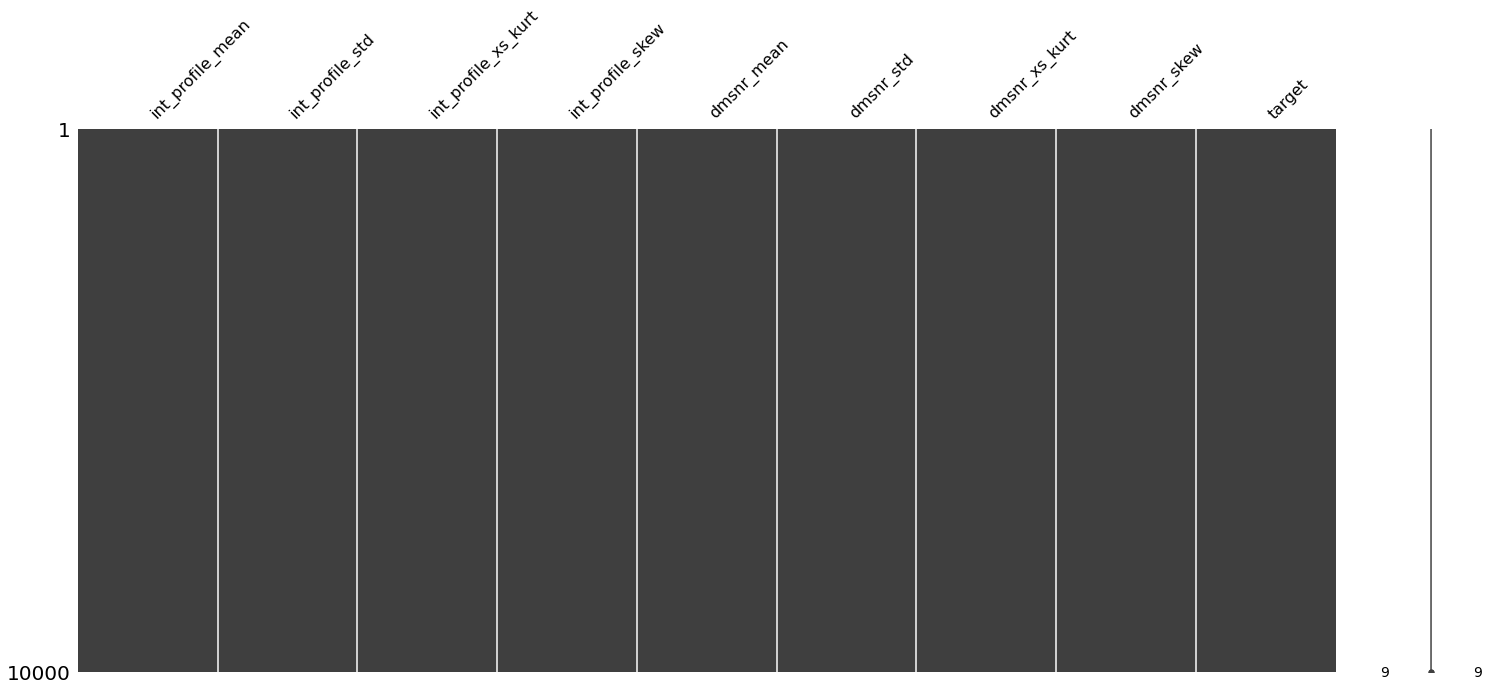

In [36]:
mno.matrix(df)

I have now sucessfully replaced all missing values in the dataset using a linear regression imputation method.

### Check for outliers 

In [37]:
percent_outliers = outliers.count() * 100/len(df)
percent_outliers_df = pd.DataFrame({'percent_outliers(%)': percent_outliers})
percent_outliers_df

,percent_outliers(%)
int_profile_mean,5.61
int_profile_std,1.45
int_profile_xs_kurt,7.60
int_profile_skew,10.61
dmsnr_mean,16.12
dmsnr_std,12.07
dmsnr_xs_kurt,2.86
dmsnr_skew,4.88
target,8.97


We can see the varying percentages of outliers for each column.(Disregard target as there are only 2 values(categorical data). We can also view these visually.

In [38]:
params = {'axes.titlesize':'20',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14'}
matplotlib.rcParams.update(params)

C:\Users\Edmond Agbaje\AppData\Local\Temp\ipykernel_8960\1747743280.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color='#666666', linestyle='-')


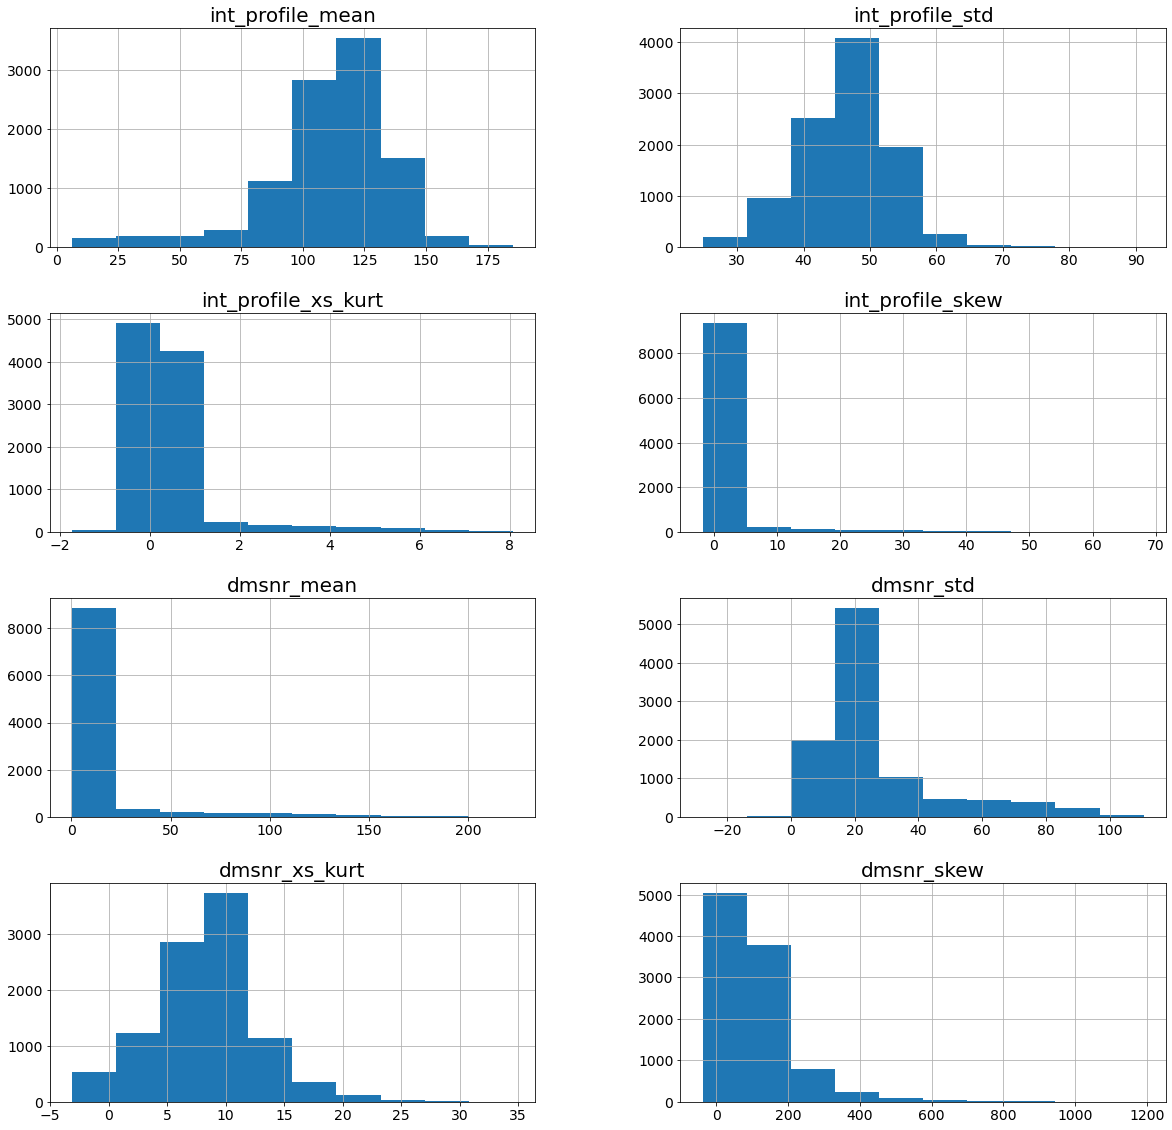

In [39]:
df.hist(figsize=(20, 25), layout=(5,2));
plt.grid(b=True, which='major', color='#666666', linestyle='-')

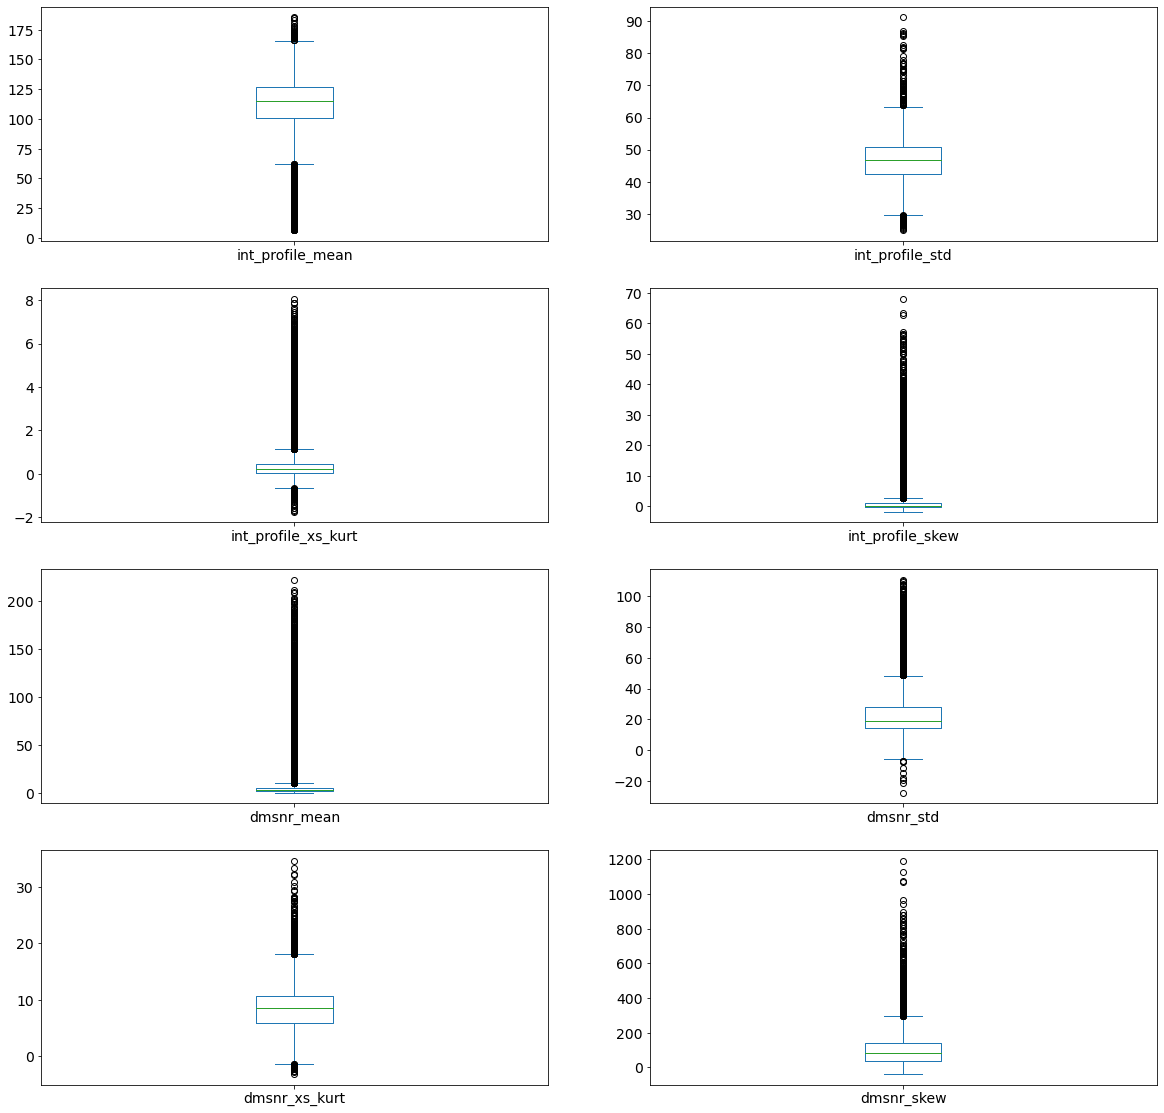

In [40]:
numeric_columns = df.select_dtypes(['float64']).columns
df[numeric_columns].plot(kind='box', subplots=True, figsize=(20,25), layout=(5, 2), sharex=False, sharey=False);

Let's investgate each individually

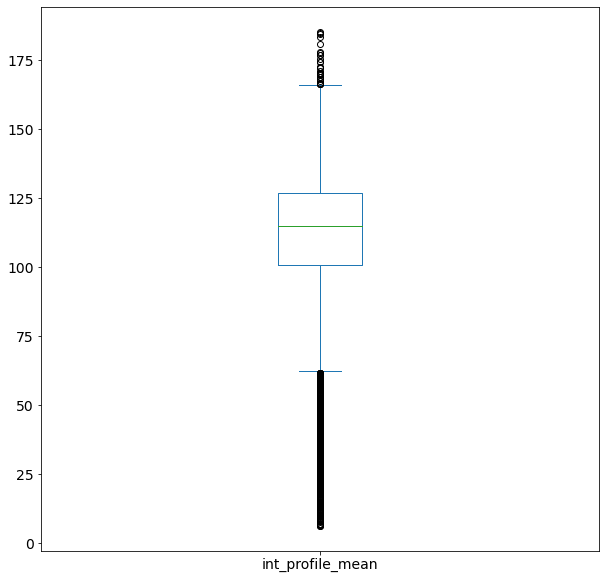

In [41]:
df['int_profile_mean'].plot(kind='box', figsize=(10,10));

In [42]:
perc95 = np.percentile(df['int_profile_mean'], 95)
perc95

142.945703125

In [43]:
df[df['int_profile_mean'] > perc95].shape

(500, 9)

This shows 5% of the data are affected by the clamping which is very low, so I will keep the outliers in the dataset.

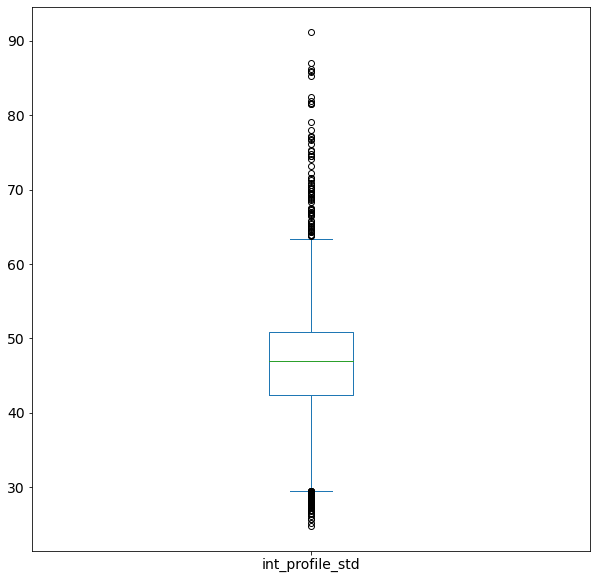

In [44]:
df['int_profile_std'].plot(kind='box', figsize=(10,10));

In [45]:
perc95 = np.percentile(df['int_profile_std'], 95)
perc95

56.39414459699999

In [46]:
df[df['int_profile_std'] > perc95].shape

(500, 9)

Once again here there is only 5% of the data affected for the 95% percentile so I feel it's best to keep the outliers in the dataset.

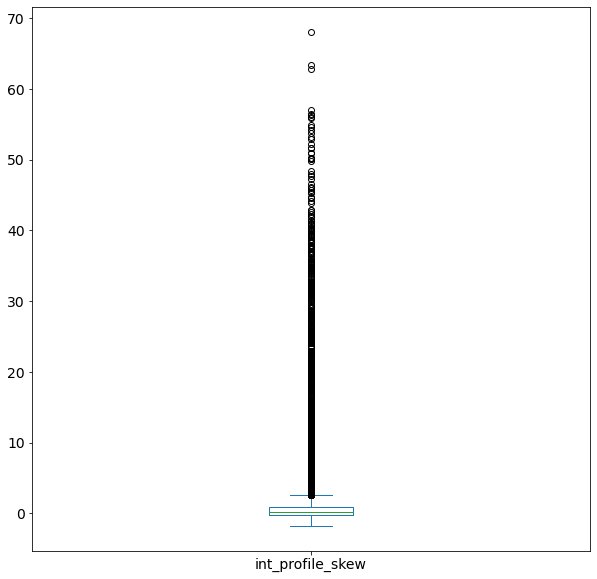

In [47]:
df['int_profile_skew'].plot(kind='box', figsize=(10,10));

In [48]:
perc95 = np.percentile(df['int_profile_skew'], 95)
perc95

9.56617979554995

In [49]:
df[df['int_profile_skew'] > perc95].shape

(500, 9)

The same outcome is observed here also.

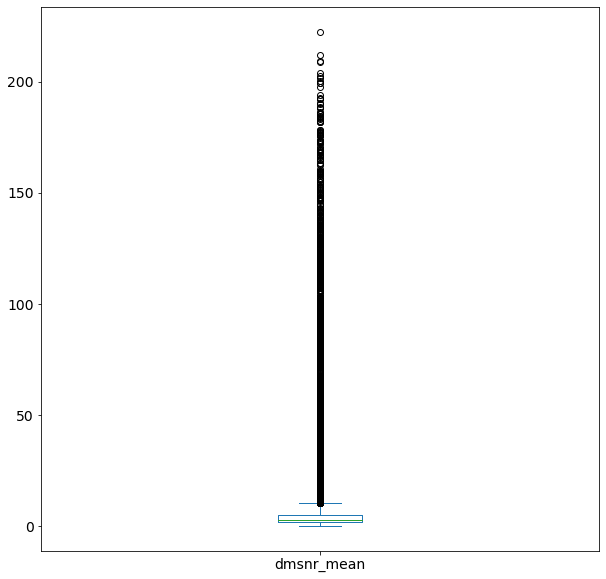

In [50]:
df['dmsnr_mean'].plot(kind='box', figsize=(10,10));

In [51]:
perc95 = np.percentile(df['dmsnr_mean'], 95)
perc95

80.4348244104999

In [52]:
df[df['dmsnr_mean'] > perc95].shape

(500, 9)

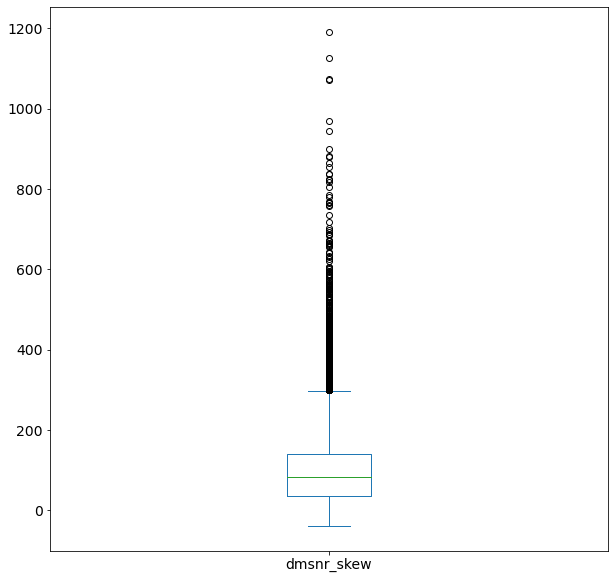

In [53]:
df['dmsnr_skew'].plot(kind='box', figsize=(10,10));

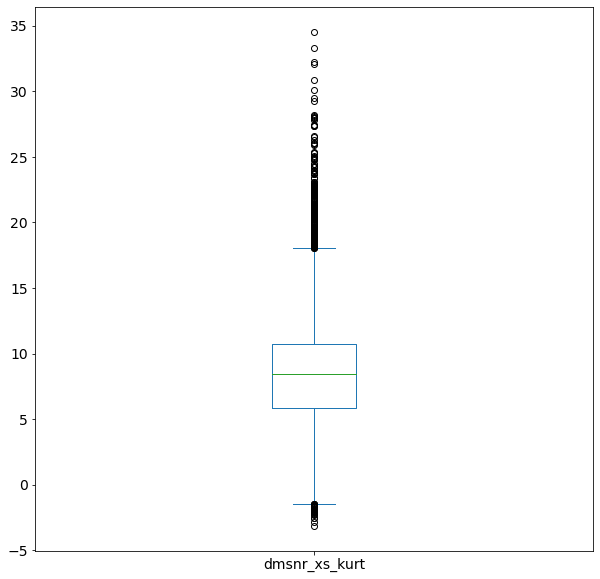

In [54]:
df['dmsnr_xs_kurt'].plot(kind='box', figsize=(10,10));

In [55]:
perc95 = np.percentile(df['dmsnr_xs_kurt'], 95)
perc95

15.863992783999999

In [56]:
df[df['dmsnr_xs_kurt'] > perc95].shape

(500, 9)

We can see here that 5% of the data is affected by the outliers so I've decided to keep the outlier values and to not clamp them to the 95th percentile as this data could be useful for future evaluation.

### Summary of the issues in data and handling strategies considered/implemented

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|int_profile_mean(float64)                          |  Few Outliers(5.61%) |Investigate if necessary to clamp to 95% due to spread of data|
int_profile_std(float64)             | Few Outliers(1.45%)              | Investigate if necessary to clamp to 95% due to spread of data      
int_profile_xs_kurt(float64)       | Missing Values(13.77%) | Linear Regression Imputation to fill rows |
int_profile_skew(float64)             | Outliers(10.61%)       | Investigate if necessary to clamp to 95% due to spread of data  | 
dmsnr_mean(float64)                 | Outliers(16.12%) | Investigate if necessary to clamp to 95% due to spread of data|   
dmsnr_std(float64)                | Missing Values(9.41%)| Linear Regression Imputation to fill rows|
dmnsr_xs_kurt(float64)    | Outliers(2.86%) | Investigate if necessary to clamp to 95% due to spread of data|
dmsnr_skew(float64)         | Missing Values(4.96%) | Linear Regression Imputation to fill rows|
target(float64)                  | None | Just changed to categorical data to use as indentifier |

## Task 2

Now we'll see whether we need to standardise or normalise the features in the dataset.

In [57]:
print("Range of int_profile_mean is: ",df["int_profile_mean"].max()-df["int_profile_mean"].min())
print("Range of int_profile_std is: ",df["int_profile_std"].max()-df["int_profile_std"].min())
print("Range of int_profile_xs_kurt is: ",df["int_profile_xs_kurt"].max()-df["int_profile_xs_kurt"].min())
print("Range of int_profile_skew is: ",df["int_profile_skew"].max()-df["int_profile_skew"].min())
print("Range of dmsnr_mean is: ",df["dmsnr_mean"].max()-df["dmsnr_mean"].min())
print("Range of dmsnr_std is: ",df["dmsnr_std"].max()-df["dmsnr_std"].min())
print("Range of dmsnr_xs_kurt is: ",df["dmsnr_xs_kurt"].max()-df["dmsnr_xs_kurt"].min())
print("Range of dmsnr_skew is: ",df["dmsnr_skew"].max()-df["dmsnr_skew"].min())

Range of int_profile_mean is:  179.0703125
Range of int_profile_std is:  66.43443296999999
Range of int_profile_xs_kurt is:  9.807542808
Range of int_profile_skew is:  69.89350771100001
Range of dmsnr_mean is:  222.208193998
Range of dmsnr_std is:  138.30458694803616
Range of dmsnr_xs_kurt is:  37.679113801
Range of dmsnr_skew is:  1229.5340401235558


The range for the values are high for the majority of the features. This would suggest that **normalising** the data would be the best approach. It is worth noting that these features are on different scales also.

To decide whether or not to normalise or standardise the features, I'll perform the formal statistical **Shapiro-Wilk Test**. If the p-value of the test is greater than 0.05, then we assume that the data is normally diststributed. 

In [58]:
from scipy.stats import shapiro 

for column in df.columns.values.tolist():
    p_val = shapiro(df[column])
    print(column+": ",p_val[1])

int_profile_mean:  0.0
int_profile_std:  4.421348110434293e-32
int_profile_xs_kurt:  0.0
int_profile_skew:  0.0
dmsnr_mean:  0.0
dmsnr_std:  0.0
dmsnr_xs_kurt:  1.7153873238065852e-38
dmsnr_skew:  0.0
target:  0.0


C:\Users\Edmond Agbaje\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The results here show that all features are less than 0.05, so I reject the null hypothesis of the Shapiro-Wilk Test and it shows that the value isn't normally distributed. I will now normalise the data using the **min-max normalisation scaler**

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler(feature_range=(0, 1))
scaled_data = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
scaled_data

,int_profile_mean,int_profile_std,int_profile_xs_kurt,int_profile_skew,dmsnr_mean,dmsnr_std,dmsnr_xs_kurt,dmsnr_skew,target
0,0.579120,0.197372,0.210526,0.043322,0.021798,0.419238,0.251279,0.063994,0.0
1,0.590463,0.444083,0.197562,0.016864,0.012609,0.365660,0.306665,0.091016,0.0
2,0.533179,0.169274,0.207173,0.050758,0.002668,0.270385,0.565991,0.367483,0.0
3,0.952358,0.322124,0.006014,0.074032,0.635409,0.930227,0.073341,0.030027,0.0
4,0.613804,0.264414,0.193202,0.031170,0.003721,0.279657,0.490757,0.265048,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.795864,0.347850,0.132173,0.029120,0.011262,0.341110,0.296968,0.088021,0.0
9996,0.501941,0.749431,0.248961,0.011901,0.046899,0.453770,0.181811,0.042956,1.0
9997,0.800881,0.359865,0.138465,0.031374,0.176764,0.719311,0.121143,0.031628,0.0
9998,0.606823,0.482386,0.186902,0.019794,0.513431,0.746326,0.049796,0.031160,0.0


## Task 3

I will now decide the evaluation measure that's best suited to the application and dataset. Let's look at how the target class is split as this is the classifier for the dataset.

In [60]:
scaled_data["target"].value_counts()

0.0    9103
1.0     897
Name: target, dtype: int64

Text(0, 0.5, 'Target')

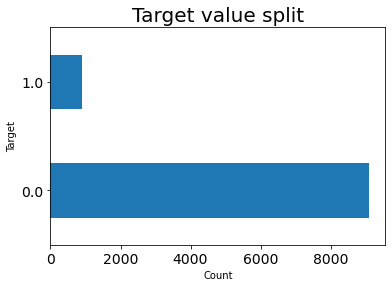

In [61]:
scaled_data["target"].value_counts().plot(kind='barh')
plt.title("Target value split")
plt.xlabel("Count")
plt.ylabel("Target")

We can see that the Target class is **imbalanced** as the data isn't represented equally. 91.03% of the data belongs to the "0" target class while only 8.97% belonging to the "1" target class. This means that less than 10% of the data was classified as a pulsar star.This is extremely imbalanced data. To deal with these skewed classes, I will use a balanced evaluation measure.

I will use the balanced accuracy variant: **F1-Measure** which gets the harmonic mean of precision and recall.



## Task 4

In [62]:
scaled_data

,int_profile_mean,int_profile_std,int_profile_xs_kurt,int_profile_skew,dmsnr_mean,dmsnr_std,dmsnr_xs_kurt,dmsnr_skew,target
0,0.579120,0.197372,0.210526,0.043322,0.021798,0.419238,0.251279,0.063994,0.0
1,0.590463,0.444083,0.197562,0.016864,0.012609,0.365660,0.306665,0.091016,0.0
2,0.533179,0.169274,0.207173,0.050758,0.002668,0.270385,0.565991,0.367483,0.0
3,0.952358,0.322124,0.006014,0.074032,0.635409,0.930227,0.073341,0.030027,0.0
4,0.613804,0.264414,0.193202,0.031170,0.003721,0.279657,0.490757,0.265048,0.0
...,...,...,...,...,...,...,...,...,...
9995,0.795864,0.347850,0.132173,0.029120,0.011262,0.341110,0.296968,0.088021,0.0
9996,0.501941,0.749431,0.248961,0.011901,0.046899,0.453770,0.181811,0.042956,1.0
9997,0.800881,0.359865,0.138465,0.031374,0.176764,0.719311,0.121143,0.031628,0.0
9998,0.606823,0.482386,0.186902,0.019794,0.513431,0.746326,0.049796,0.031160,0.0


In [63]:
scaled_data["target"] = scaled_data["target"].astype("int64")
scaled_data["target"] = scaled_data["target"].astype("category")
scaled_data.dtypes

int_profile_mean        float64
int_profile_std         float64
int_profile_xs_kurt     float64
int_profile_skew        float64
dmsnr_mean              float64
dmsnr_std               float64
dmsnr_xs_kurt           float64
dmsnr_skew              float64
target                 category
dtype: object

In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score

I will now split the data into training and testing samples. I'll use a standard 80:20 split so there are enough samples in both the training and testing split. The training set is used for feature selection and model fitting. The test set is used for the evaluation after the best model is selected. 

Setting the **random_state** guarantees that the results are reproducible.

In [65]:
##split the data into test and train
X = scaled_data.drop("target",axis=1)
y = scaled_data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42,stratify=y)

Here I will now look at various different classification models(i.e Decision Tree, kNN, SVM-> linear, poly, rbf and sigmoid kernels). I will compare these classifiers based on their f1-score as this is the evaluation measure I have chosen based on the fact that there's a very high imbalance in the target class.

The **F1 measure is the harmonic mean of precision and recall. F1** is most suitable here than balanced evaluation as the data is imbalanced in the target class.

I will also use cross validation as my evaluation methodology for this comparison, specifically the **Stratified KFold Validation with shuffling** as improves different models using hyper-parameter tuning. It will also help in model comparison as well as reducing bias.

I will also explore various parameter using hyper-parameter tuning to find the best classifiers and which are the best parameters for each  classifier.

### Decision Tree Classifier 

In [66]:
dt = DecisionTreeClassifier(criterion = "entropy",random_state=12)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=12)

In [67]:
y_predicted = dt.predict(X_train)
y_predicted[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [68]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(dt, X, y, cv=cv, scoring='f1')
test_score = results["test_score"]
test_score

array([0.82352941, 0.84324324, 0.84916201, 0.83146067, 0.83428571,
       0.83516484, 0.85245902, 0.80898876, 0.84153005, 0.77894737])

In [69]:
print(f"The f1 score is:" f" {test_score.mean():.3f} +/- {test_score.std():.3f}")

The f1 score is: 0.830 +/- 0.021


I can check to see various depths of the decision tree to see at which depth gives the best f1-score.

In [70]:
param_grid = {
    "max_depth": [None, 2,3, 5, 7],#the max depth of the tree
    "min_samples_leaf": [1, 2, 3, 5, 10]#min number of samples required at a leaf node
}
#GridSearch optimises the DT hyperparameters using stratified 10-fold cross-validated grid searcg over param_grid
dt_grid = GridSearchCV(dt, param_grid, scoring="f1", cv=10)
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

print(f"Best: {dt_best}")
print(f"Average F1: {dt_grid.best_score_:.3f}")

Best: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=12)
Average F1: 0.887


We see here that the Decision Tree with the max depth of 5 and a min number of samples as 3 is the best Decision Tree classifier for the data set.

### kNN Classifier

In [71]:
knn_clf = KNeighborsClassifier() 
# fit the KNN model training data 
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
# predict on the training dataset 
y_predicted = knn_clf.predict(X_train)
y_predicted[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [73]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(knn_clf, X, y, cv=cv, scoring='f1')
test_score = results["test_score"]
test_score

array([0.83544304, 0.90909091, 0.9122807 , 0.88757396, 0.88095238,
       0.86549708, 0.83798883, 0.86746988, 0.87150838, 0.84269663])

In [74]:
print(f"The f1 score is:" f" {test_score.mean():.3f} +/- {test_score.std():.3f}")

The f1 score is: 0.871 +/- 0.026


I can then explore various different values of n as the nearest neighbours values to see which gives the best f1 score:

In [75]:
knn_best, max_score = None, 0
for n in [2,3, 5, 10, 12, 15]:
    clf = KNeighborsClassifier(n_neighbors=n)
    ts = cross_val_score(clf, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1)
    mean = ts.mean()
    if mean > max_score:
        max_score = mean
        knn_best = clf
    print(f"{clf}\n{cv}\nAverage F1: {mean:.3f} +/- {ts.std():.3f}\n-----")
print(f"Best: {knn_best}")    

KNeighborsClassifier(n_neighbors=2)
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.842 +/- 0.019
-----
KNeighborsClassifier(n_neighbors=3)
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.859 +/- 0.022
-----
KNeighborsClassifier()
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.868 +/- 0.023
-----
KNeighborsClassifier(n_neighbors=10)
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.855 +/- 0.025
-----
KNeighborsClassifier(n_neighbors=12)
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.859 +/- 0.026
-----
KNeighborsClassifier(n_neighbors=15)
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.859 +/- 0.025
-----
Best: KNeighborsClassifier()


We see here that the best kNN classifier for the dataset is when k=5.

### SVM Classifiers
#### Linear

In [76]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [77]:
# predict on the training dataset 
y_predicted = svc.predict(X_train)
y_predicted[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [78]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(svc, X, y, cv=cv, scoring='f1')
test_score = results["test_score"]
test_score

array([0.81578947, 0.875     , 0.92215569, 0.875     , 0.82802548,
       0.83950617, 0.87861272, 0.86585366, 0.87804878, 0.82840237])

In [79]:
print(f"The f1 score is:" f" {test_score.mean():.3f} +/- {test_score.std():.3f}")

The f1 score is: 0.861 +/- 0.031


#### Poly

In [80]:
svc = SVC(kernel='poly') # default value of parameter degree = 3
svc.fit(X_train, y_train)

SVC(kernel='poly')

In [81]:
# predict on the training dataset 
y_predicted = svc.predict(X_train)
y_predicted[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [82]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(svc, X, y, cv=cv, scoring='f1')
test_score = results["test_score"]
test_score

array([0.85534591, 0.92397661, 0.93567251, 0.89820359, 0.88622754,
       0.90697674, 0.88135593, 0.89940828, 0.90697674, 0.8700565 ])

In [83]:
print(f"The f1 score is:" f" {test_score.mean():.3f} +/- {test_score.std():.3f}")

The f1 score is: 0.896 +/- 0.023


#### Radial Basis Function (rbf)

In [84]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [85]:
# predict on the training dataset 
y_predicted = svc.predict(X_train)
y_predicted[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [86]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(svc, X, y, cv=cv, scoring='f1')
test_score = results["test_score"]
test_score

array([0.84615385, 0.87654321, 0.92941176, 0.87804878, 0.86585366,
       0.8742515 , 0.87356322, 0.87272727, 0.89534884, 0.8700565 ])

In [87]:
print(f"The f1 score is:" f" {test_score.mean():.3f} +/- {test_score.std():.3f}")

The f1 score is: 0.878 +/- 0.021


#### Sigmoid

In [88]:
svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [89]:
# predict on the training dataset 
y_predicted = svc.predict(X_train)
y_predicted[:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [90]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_validate(svc, X, y, cv=cv, scoring='f1')
test_score = results["test_score"]
test_score

array([0.52173913, 0.60540541, 0.55865922, 0.52459016, 0.5027933 ,
       0.53608247, 0.5       , 0.47398844, 0.52910053, 0.47826087])

In [91]:
print(f"The f1 score is:" f" {test_score.mean():.3f} +/- {test_score.std():.3f}")

The f1 score is: 0.523 +/- 0.037


Since I've evaluated each SVM classifier individually, I can explore the various kernel functions and see which one is best for the dataset.

In [92]:
svm_best, max_score = None, 0
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    clf = SVC(kernel=kernel)
    scores = cross_val_score(clf, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1)
    mean = scores.mean()
    if mean > max_score:
        max_score = mean
        svm_best = clf
    print(f"{clf}\n{cv}\nAverage F1: {mean:.3f} +/- {scores.std():.3f}\n-----")
print(f"Best: {svm_best}")

SVC(kernel='linear')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.856 +/- 0.034
-----
SVC(kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.891 +/- 0.029
-----
SVC()
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.874 +/- 0.029
-----
SVC(kernel='sigmoid')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.552 +/- 0.064
-----
Best: SVC(kernel='poly')


Based on this evaluation, we can see that the best kernel to use as SVM classifier is the polynomial kernel. This is a surprising result as I expected rbf(radial basis function) to be the best as this is the most popular svm kernel choice.

This may be due to the fact that the training data is normalised, and this is where we tend to get the best results for polynomial kernels.(i.e when the data is normalised)

As poly is the best kernel here, I can also investigate to what degree gives the most accurate results.

In [93]:
poly_best, max_score = None, 0
for d in [2,3, 4, 5, 6]:
    clf = SVC(kernel="poly", degree = d)
    ts = cross_val_score(clf, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1)
    mean = ts.mean()
    if mean > max_score:
        max_score = mean
        poly_best = clf
    print(f"{clf}\n{cv}\nAverage F1: {mean:.3f} +/- {ts.std():.3f}\n-----")
print(f"Best: {poly_best}")    

SVC(degree=2, kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.887 +/- 0.031
-----
SVC(kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.891 +/- 0.029
-----
SVC(degree=4, kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.886 +/- 0.028
-----
SVC(degree=5, kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.885 +/- 0.029
-----
SVC(degree=6, kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.885 +/- 0.029
-----
Best: SVC(kernel='poly')


From the results obtained, it shows that the degree of 3 is the gives the best f1 score. This is expected as this is the default degree for polynomial kernel.

I can then explore which is the best overall classifier for the dataset based on the parameter settings used earlier.

In [94]:
##list containing best classifiers obtained
best_clfs = [dt_best, svm_best, knn_best]
best_clfs

[DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                        random_state=12),
 SVC(kernel='poly'),
 KNeighborsClassifier()]

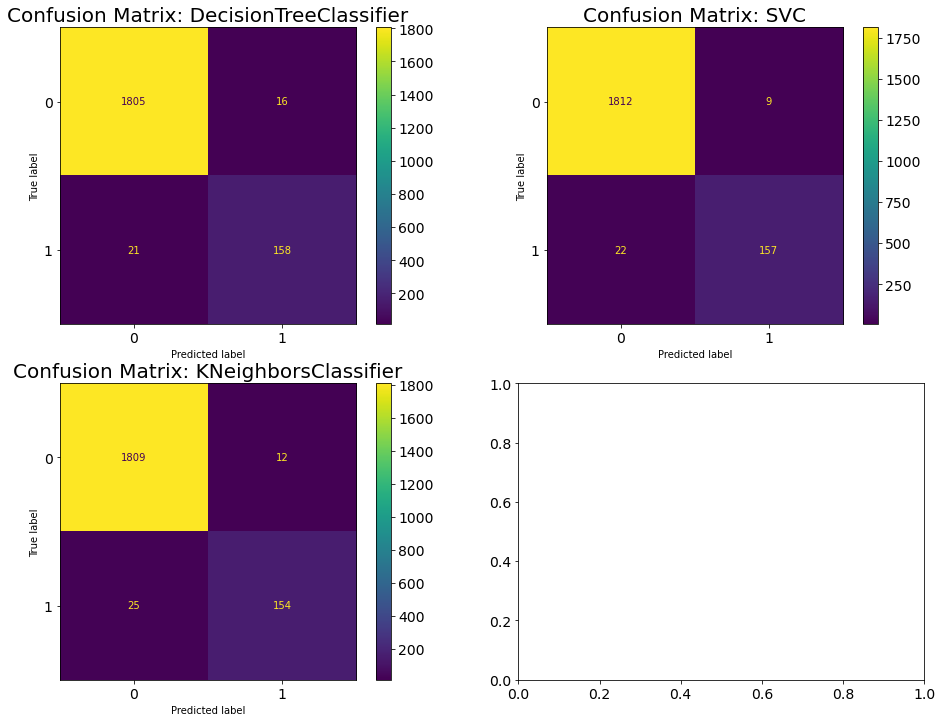

In [95]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))
i, j = 0, 0
for clf in best_clfs:
    clf_name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, ax=ax[i][j])
    disp.ax_.set_title(f"Confusion Matrix: {clf_name}")    
    j += 1
    if j == 2:
        i += 1
        j = 0

The Decision Tree Classifier has the highest number of True Positives(158) out of the best models This is slighty higher than the number of true positives for SVM with a poly kernel(157) and has a fewer numner of False Positives(9).

So here I would say SVM is slightly better overall.

In [96]:
overall_best, max_score = None, 0
for clf in best_clfs:
    ts = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1, scoring="f1")
    mean = ts.mean()
    if mean > max_score:
        max_score = mean
        overall_best = clf
    print(f"{clf}\nAverage F1: {ts.mean():.3f} +/- {ts.std():.3f}\n-----")
print(f"Overall Best Classifier: {overall_best}")  

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=12)
Average F1: 0.889 +/- 0.027
-----
SVC(kernel='poly')
Average F1: 0.891 +/- 0.029
-----
KNeighborsClassifier()
Average F1: 0.868 +/- 0.023
-----
Overall Best Classifier: SVC(kernel='poly')


We see here however that when comparing F1 scores, the SVM Classifier with the polynomial kernel is the best classifier.

I am a bit surprised by the variation however the number of True Positves was extremely close to the number of True Positives for the Decision Tree.

In conclusion my Decision Tree Classifier and SVM classifier with the polynomial kernel are very similar in how they evaluate the classification dataset.

### Task 5 

Now using filtering techniques, I will identify the most discriminative features as well as the least discriminative features  in the dataset.

I will then run the SVM classifiers with the four different kernels on the top three and bottom three discriminative features in the dataset to observe how they compare.

I have chosen to use **Information Gain(Mutual Information)** as my filtering technique to identify the top 3 features as well as the bottom 3 features. Mutual Information measures the amount of dependency between two random variables. It is based on entropy(a value of 0 indicates variables are completely independent).


In [97]:
i_scores = mutual_info_classif(X_train, y_train, random_state=12)
features_info_gain = pd.DataFrame(i_scores,index = X_train.columns, columns =["I-Gain"])
features_info_gain.sort_values(by=["I-Gain"], ascending=False, inplace=True)

Let's look at the features visually to see the top 3 and bottom 3 features.

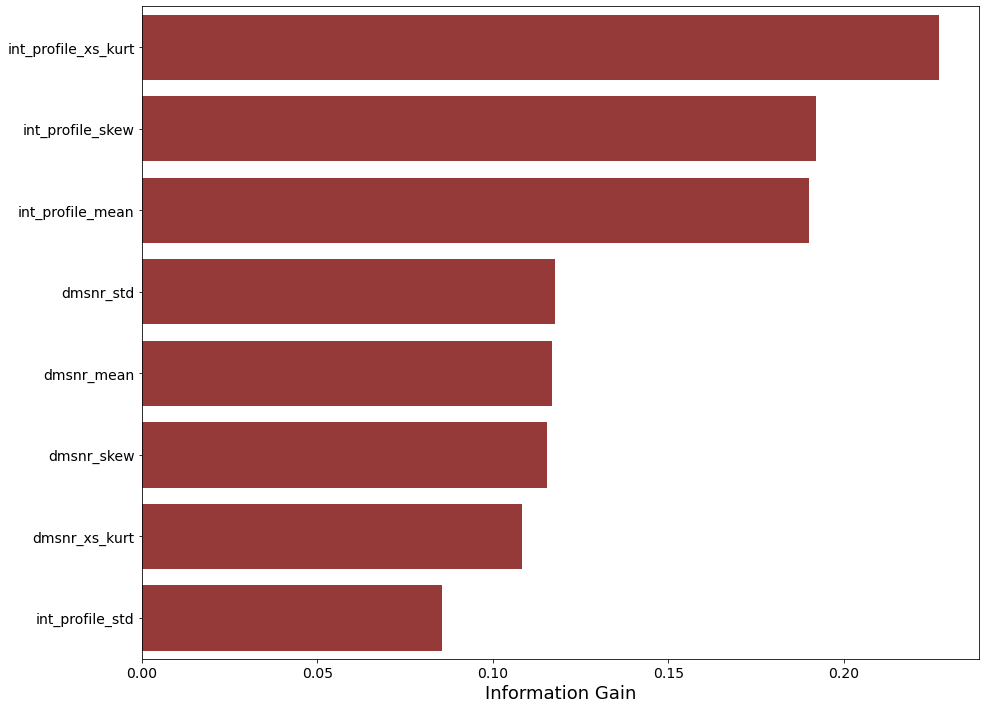

In [98]:
plt.figure(figsize=(15, 12))
column_names = features_info_gain[features_info_gain["I-Gain"] > 0]
sns.barplot(x="I-Gain", y=column_names.index, data=column_names, color="brown")
plt.xlabel("Information Gain", fontsize=18)
plt.show()

We can see that the top 3 features are **int_profile_xs_kurt, int_profile_skew and int_profile_mean**. The bottom 3 features are **dmsnr_skew, dmsnr_xs_kurt, int_profile_std**.



In [99]:
# Select top 3 features ranked by I-Gain
top_3_features = list(features_info_gain[:3].index)
top_3_features

['int_profile_xs_kurt', 'int_profile_skew', 'int_profile_mean']

In [100]:
bottom_3_features = list(features_info_gain[-3:].index)
bottom_3_features

['dmsnr_skew', 'dmsnr_xs_kurt', 'int_profile_std']

Now I wil run them with the SVM classifiers with the four kernels. To observe how they compare based on their f1-score as the data is imbalanced. 

Let's run the SVM Classifiers with the four kernels on the top 3 features and see their f1 scores.

In [101]:
top_3_features

['int_profile_xs_kurt', 'int_profile_skew', 'int_profile_mean']

In [102]:
svm_best, max_score = None, 0
clf_name = svc.__class__.__name__
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    clf = SVC(kernel=kernel)
    scores = cross_val_score(clf, X_train[top_3_features], y_train, cv=cv, scoring="f1", n_jobs=-1)
    mean = scores.mean()
    if mean > max_score:
        max_score = mean
        svm_best = clf
    print(f"{clf}\n{cv}\nAverage F1: {mean:.3f} +/- {scores.std():.3f}\n-----")
print(f"Best: {svm_best}")

SVC(kernel='linear')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.829 +/- 0.023
-----
SVC(kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.879 +/- 0.028
-----
SVC()
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.867 +/- 0.033
-----
SVC(kernel='sigmoid')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.677 +/- 0.042
-----
Best: SVC(kernel='poly')


We see here that the f1 scores are very high with polynomial kernels being the best SVM Clasifier.

Now let's look at the bottom 3 features.

In [103]:
bottom_3_features

['dmsnr_skew', 'dmsnr_xs_kurt', 'int_profile_std']

In [104]:
svm_best, max_score = None, 0
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    clf = SVC(kernel=kernel)
    scores = cross_val_score(clf, X_train[bottom_3_features], y_train, cv=cv, scoring="f1", n_jobs=-1)
    mean = scores.mean()
    if mean > max_score:
        max_score = mean
        svm_best = clf
    print(f"{clf}\n{cv}\nAverage F1: {mean:.3f} +/- {scores.std():.3f}\n-----")
print(f"Best: {svm_best}")

SVC(kernel='linear')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.668 +/- 0.039
-----
SVC(kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.706 +/- 0.039
-----
SVC()
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.679 +/- 0.041
-----
SVC(kernel='sigmoid')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.009 +/- 0.007
-----
Best: SVC(kernel='poly')


We see that polynomial kernel performs the best here once again, but the f1 scores are extremely low showing that the bottom 3 features perform significantly worse than the top 3 features.

## Task 6 

I will now identify th most discriminating features to predict the binary outcome of the dataset using the mlxtend package to perform wrapper methods for feature selection. 

I will perform these on each of the classifiers and investigate the difference between the feature subsets produced by the filter and wrapper techniques.

Wrapper techniques are computationally more expensive that filters so they will they are expected to take longer to obtain the most discriminating features.

#### Decision Tree

In [105]:
sfs_forward = SFS(dt, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='f1',
                  cv=10)
 
sfs_forward = sfs_forward.fit(X_train, y_train)

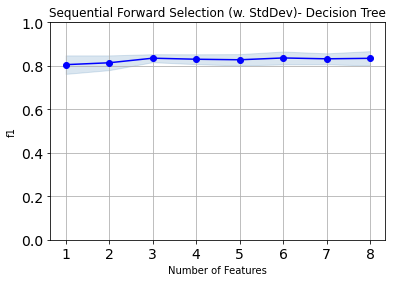

('int_profile_mean', 'int_profile_std', 'int_profile_xs_kurt', 'dmsnr_mean', 'dmsnr_std', 'dmsnr_xs_kurt')


In [106]:
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)- Decision Tree',fontsize = 12)
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

In [107]:
dt_fwd = pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
dt_fwd.insert(1,"Classifier",dt)
dt_fwd.insert(1,"Sequence Direction","Forward")
dt_fwd

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 1, 2, 4, 5, 6)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8115942028985507, 0.8843537414965986, 0.842...",0.836277,"(int_profile_mean, int_profile_std, int_profil...",0.021961,0.029569,0.009856
3,"(1, 2, 4)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8175182481751825, 0.861111111111111, 0.8129...",0.835204,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.013635,0.018358,0.006119
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8175182481751825, 0.8590604026845639, 0.818...",0.834634,"(int_profile_mean, int_profile_std, int_profil...",0.024442,0.032909,0.01097
7,"(0, 1, 2, 4, 5, 6, 7)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8208955223880596, 0.8783783783783784, 0.847...",0.832352,"(int_profile_mean, int_profile_std, int_profil...",0.018703,0.025182,0.008394
4,"(1, 2, 4, 6)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.835820895522388, 0.8243243243243243, 0.8104...",0.830435,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.016886,0.022736,0.007579
5,"(1, 2, 4, 5, 6)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8057553956834531, 0.8163265306122449, 0.849...",0.827927,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.019403,0.026125,0.008708
2,"(2, 4)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8120300751879699, 0.8079470198675496, 0.824...",0.814132,"(int_profile_xs_kurt, dmsnr_mean)",0.025174,0.033894,0.011298
1,"(2,)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8270676691729323, 0.8, 0.7770700636942675, ...",0.80546,"(int_profile_xs_kurt,)",0.03158,0.04252,0.014173


In [108]:
sfs_backward = SFS(dt, 
                  k_features="best", 
                  forward=False, 
                  floating=False,
                  scoring='f1',
                  cv=10)

 
sfs_backward = sfs_backward.fit(X_train, y_train)

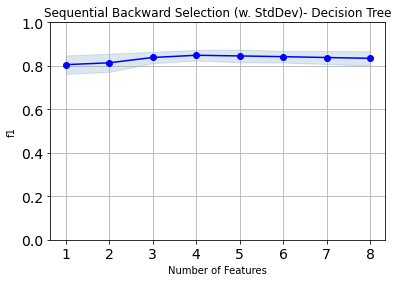

('int_profile_xs_kurt', 'int_profile_skew', 'dmsnr_std', 'dmsnr_skew')


In [109]:
fig1 = plot_sfs(sfs_backward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)- Decision Tree',fontsize = 12)
plt.grid()
plt.show()
print(sfs_backward.k_feature_names_)

In [110]:
dt_back = pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
dt_back.insert(1,"Classifier",dt)
dt_back.insert(1,"Sequence Direction","Backward")
dt_back

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(2, 3, 5, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8382352941176471, 0.8194444444444445, 0.857...",0.84868,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.018199,0.024504,0.008168
5,"(2, 3, 5, 6, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8467153284671534, 0.802721088435374, 0.8724...",0.845625,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.021652,0.029152,0.009717
6,"(0, 2, 3, 5, 6, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8656716417910447, 0.8516129032258065, 0.823...",0.84221,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.019809,0.026671,0.00889
3,"(2, 3, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8296296296296297, 0.8591549295774648, 0.821...",0.838421,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.019614,0.026408,0.008803
7,"(0, 1, 2, 3, 5, 6, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8296296296296297, 0.8859060402684563, 0.818...",0.838282,"(int_profile_mean, int_profile_std, int_profil...",0.022287,0.030007,0.010002
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8175182481751825, 0.8590604026845639, 0.818...",0.834634,"(int_profile_mean, int_profile_std, int_profil...",0.024442,0.032909,0.01097
2,"(2, 3)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8285714285714286, 0.8243243243243243, 0.813...",0.813982,"(int_profile_xs_kurt, int_profile_skew)",0.031181,0.041983,0.013994
1,"(2,)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8270676691729323, 0.8, 0.7770700636942675, ...",0.80546,"(int_profile_xs_kurt,)",0.03158,0.04252,0.014173


We see here that the sequential backward feature selection is more effective with slightly higher average scores.

#### kNN Classifier

In [111]:
sfs_forward = SFS(knn_clf, 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='f1',
                  cv=10)


sfs_forward = sfs_forward.fit(X_train, y_train)

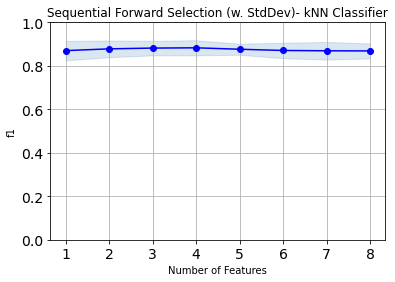

('int_profile_mean', 'int_profile_xs_kurt', 'int_profile_skew', 'dmsnr_skew')


In [112]:
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)- kNN Classifier',fontsize = 12)
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

In [113]:
knn_fwd=pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
knn_fwd.insert(1,"Classifier",knn_clf)
knn_fwd.insert(1,"Sequence Direction","Forward")
knn_fwd

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 2, 3, 7)",Forward,KNeighborsClassifier(),"[0.8702290076335878, 0.9130434782608696, 0.881...",0.882927,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.025721,0.034631,0.011544
3,"(0, 2, 7)",Forward,KNeighborsClassifier(),"[0.8702290076335878, 0.9130434782608696, 0.881...",0.881718,"(int_profile_mean, int_profile_xs_kurt, dmsnr_...",0.024778,0.033362,0.011121
2,"(0, 2)",Forward,KNeighborsClassifier(),"[0.8955223880597014, 0.8873239436619719, 0.875...",0.878171,"(int_profile_mean, int_profile_xs_kurt)",0.028441,0.038294,0.012765
5,"(0, 2, 3, 6, 7)",Forward,KNeighborsClassifier(),"[0.8702290076335878, 0.8985507246376812, 0.873...",0.87635,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.018884,0.025426,0.008475
6,"(0, 1, 2, 3, 6, 7)",Forward,KNeighborsClassifier(),"[0.8244274809160305, 0.9037037037037037, 0.865...",0.870754,"(int_profile_mean, int_profile_std, int_profil...",0.026325,0.035444,0.011815
1,"(2,)",Forward,KNeighborsClassifier(),"[0.8615384615384616, 0.8695652173913043, 0.871...",0.870049,"(int_profile_xs_kurt,)",0.033161,0.044648,0.014883
7,"(0, 1, 2, 3, 5, 6, 7)",Forward,KNeighborsClassifier(),"[0.8549618320610686, 0.9051094890510948, 0.873...",0.86929,"(int_profile_mean, int_profile_std, int_profil...",0.030184,0.04064,0.013547
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Forward,KNeighborsClassifier(),"[0.846153846153846, 0.8920863309352517, 0.8732...",0.868604,"(int_profile_mean, int_profile_std, int_profil...",0.025639,0.034521,0.011507


In [114]:
sfs_backward = SFS(knn_clf, 
                  k_features="best", 
                  forward=False, 
                  floating=False,
                  scoring='f1',
                  cv=10)

 
sfs_backward = sfs_backward.fit(X_train, y_train)

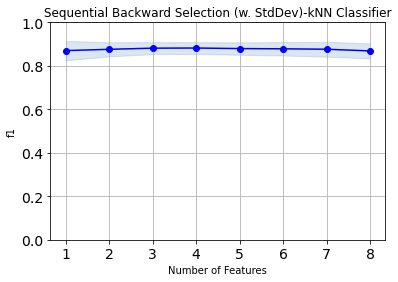

('int_profile_xs_kurt', 'int_profile_skew', 'dmsnr_mean', 'dmsnr_xs_kurt')


In [115]:
fig1 = plot_sfs(sfs_backward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)-kNN Classifier',fontsize=12)
plt.grid()
plt.show()
print(sfs_backward.k_feature_names_)

In [116]:
knn_back=pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
knn_back.insert(1,"Classifier",knn_clf)
knn_back.insert(1,"Sequence Direction","Backward")
knn_back

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(2, 3, 4, 6)",Backward,KNeighborsClassifier(),"[0.8549618320610686, 0.8955223880597014, 0.873...",0.881961,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.020159,0.027143,0.009048
3,"(2, 3, 6)",Backward,KNeighborsClassifier(),"[0.846153846153846, 0.9051094890510948, 0.8811...",0.881317,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.020462,0.02755,0.009183
5,"(2, 3, 4, 6, 7)",Backward,KNeighborsClassifier(),"[0.8549618320610686, 0.8955223880597014, 0.873...",0.87941,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.021249,0.02861,0.009537
6,"(2, 3, 4, 5, 6, 7)",Backward,KNeighborsClassifier(),"[0.8527131782945736, 0.8905109489051095, 0.893...",0.878382,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.02289,0.03082,0.010273
7,"(1, 2, 3, 4, 5, 6, 7)",Backward,KNeighborsClassifier(),"[0.8527131782945736, 0.8823529411764706, 0.893...",0.876392,"(int_profile_std, int_profile_xs_kurt, int_pro...",0.025415,0.034219,0.011406
2,"(2, 3)",Backward,KNeighborsClassifier(),"[0.874074074074074, 0.8714285714285713, 0.8951...",0.87601,"(int_profile_xs_kurt, int_profile_skew)",0.024269,0.032676,0.010892
1,"(2,)",Backward,KNeighborsClassifier(),"[0.8615384615384616, 0.8695652173913043, 0.871...",0.870049,"(int_profile_xs_kurt,)",0.033161,0.044648,0.014883
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Backward,KNeighborsClassifier(),"[0.846153846153846, 0.8920863309352517, 0.8732...",0.868604,"(int_profile_mean, int_profile_std, int_profil...",0.025639,0.034521,0.011507


We see here that the sequential forward feature selection is more effective with slightly higher average scores.

#### SVM Classifier

#### Linear

In [117]:
sfs_forward = SFS(SVC(kernel='linear'), 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

sfs_forward = sfs_forward.fit(X_train, y_train)

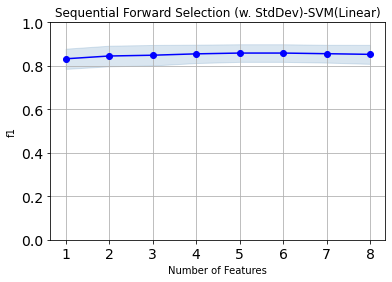

('int_profile_std', 'int_profile_xs_kurt', 'dmsnr_mean', 'dmsnr_std', 'dmsnr_xs_kurt')


In [118]:
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)-SVM(Linear)',fontsize=12)
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

In [119]:
lin_fwd=pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
lin_fwd.insert(1,"Classifier",SVC(kernel='linear'))
lin_fwd.insert(1,"Sequence Direction","Forward")
lin_fwd

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(1, 2, 4, 5, 6)",Forward,SVC(kernel='linear'),"[0.8412698412698413, 0.859375, 0.8676470588235...",0.858826,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.030105,0.040534,0.013511
6,"(1, 2, 4, 5, 6, 7)",Forward,SVC(kernel='linear'),"[0.8412698412698413, 0.859375, 0.8676470588235...",0.858826,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.030105,0.040534,0.013511
7,"(0, 1, 2, 4, 5, 6, 7)",Forward,SVC(kernel='linear'),"[0.8346456692913385, 0.859375, 0.8613138686131...",0.855885,"(int_profile_mean, int_profile_std, int_profil...",0.030405,0.040937,0.013646
4,"(2, 4, 5, 6)",Forward,SVC(kernel='linear'),"[0.848, 0.859375, 0.8676470588235294, 0.882352...",0.855163,"(int_profile_xs_kurt, dmsnr_mean, dmsnr_std, d...",0.031452,0.042347,0.014116
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Forward,SVC(kernel='linear'),"[0.8253968253968254, 0.8682170542635659, 0.867...",0.852845,"(int_profile_mean, int_profile_std, int_profil...",0.03246,0.043705,0.014568
3,"(2, 4, 6)",Forward,SVC(kernel='linear'),"[0.8503937007874015, 0.8615384615384616, 0.867...",0.848874,"(int_profile_xs_kurt, dmsnr_mean, dmsnr_xs_kurt)",0.035072,0.047221,0.01574
2,"(2, 6)",Forward,SVC(kernel='linear'),"[0.8437499999999999, 0.846153846153846, 0.8613...",0.845296,"(int_profile_xs_kurt, dmsnr_xs_kurt)",0.035196,0.047388,0.015796
1,"(2,)",Forward,SVC(kernel='linear'),"[0.8, 0.8387096774193548, 0.8549618320610687, ...",0.832416,"(int_profile_xs_kurt,)",0.034552,0.046521,0.015507


In [120]:
sfs_backward = SFS(SVC(kernel='linear'), 
                  k_features="best", 
                  forward=False, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

 
sfs_backward = sfs_backward.fit(X_train, y_train)

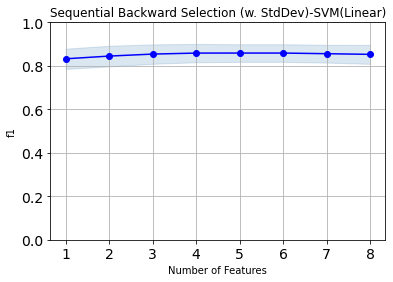

('int_profile_std', 'int_profile_xs_kurt', 'dmsnr_mean', 'dmsnr_std', 'dmsnr_xs_kurt', 'dmsnr_skew')


In [121]:
fig1 = plot_sfs(sfs_backward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)-SVM(Linear)',fontsize=12)
plt.grid()
plt.show()
print(sfs_backward.k_feature_names_)

In [122]:
lin_back=pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
lin_back.insert(1,"Classifier",SVC(kernel='linear'))
lin_back.insert(1,"Sequence Direction","Backward")
lin_back

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(1, 2, 4, 5, 6, 7)",Backward,SVC(kernel='linear'),"[0.8412698412698413, 0.859375, 0.8676470588235...",0.858826,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.030105,0.040534,0.013511
5,"(1, 2, 4, 5, 6)",Backward,SVC(kernel='linear'),"[0.8412698412698413, 0.859375, 0.8676470588235...",0.858826,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.030105,0.040534,0.013511
4,"(1, 2, 4, 5)",Backward,SVC(kernel='linear'),"[0.8412698412698413, 0.859375, 0.8676470588235...",0.858704,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.031347,0.042206,0.014069
7,"(0, 1, 2, 4, 5, 6, 7)",Backward,SVC(kernel='linear'),"[0.8346456692913385, 0.859375, 0.8613138686131...",0.855885,"(int_profile_mean, int_profile_std, int_profil...",0.030405,0.040937,0.013646
3,"(2, 4, 5)",Backward,SVC(kernel='linear'),"[0.848, 0.859375, 0.8676470588235294, 0.882352...",0.854106,"(int_profile_xs_kurt, dmsnr_mean, dmsnr_std)",0.033206,0.044709,0.014903
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Backward,SVC(kernel='linear'),"[0.8253968253968254, 0.8682170542635659, 0.867...",0.852845,"(int_profile_mean, int_profile_std, int_profil...",0.03246,0.043705,0.014568
2,"(2, 5)",Backward,SVC(kernel='linear'),"[0.8346456692913385, 0.8527131782945736, 0.861...",0.844866,"(int_profile_xs_kurt, dmsnr_std)",0.035378,0.047633,0.015878
1,"(2,)",Backward,SVC(kernel='linear'),"[0.8, 0.8387096774193548, 0.8549618320610687, ...",0.832416,"(int_profile_xs_kurt,)",0.034552,0.046521,0.015507


We see here that the sequential forward feature selection is more effective with slightly higher average scores.

#### Poly

In [123]:
sfs_forward = SFS(SVC(kernel='poly',degree=1), 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

sfs_forward = sfs_forward.fit(X_train, y_train)

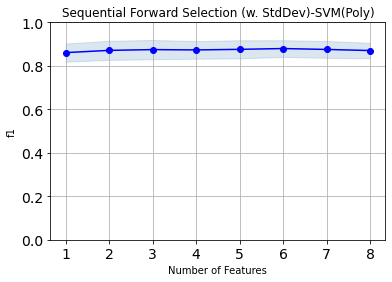

('int_profile_mean', 'int_profile_std', 'int_profile_xs_kurt', 'dmsnr_mean', 'dmsnr_std', 'dmsnr_xs_kurt')


In [124]:
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)-SVM(Poly)',fontsize=12)
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

In [125]:
poly_fwd=pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
poly_fwd.insert(1,"Classifier",SVC(kernel='poly',degree=1))
poly_fwd.insert(1,"Sequence Direction","Forward")
poly_fwd

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 1, 2, 4, 5, 6)",Forward,"SVC(degree=1, kernel='poly')","[0.859375, 0.9022556390977443, 0.9, 0.90647482...",0.879558,"(int_profile_mean, int_profile_std, int_profil...",0.028496,0.038367,0.012789
5,"(0, 2, 4, 5, 6)",Forward,"SVC(degree=1, kernel='poly')","[0.8571428571428571, 0.9104477611940299, 0.884...",0.875904,"(int_profile_mean, int_profile_xs_kurt, dmsnr_...",0.031038,0.04179,0.01393
7,"(0, 1, 2, 4, 5, 6, 7)",Forward,"SVC(degree=1, kernel='poly')","[0.859375, 0.8939393939393939, 0.8936170212765...",0.875471,"(int_profile_mean, int_profile_std, int_profil...",0.028742,0.038699,0.0129
3,"(0, 2, 6)",Forward,"SVC(degree=1, kernel='poly')","[0.876923076923077, 0.9051094890510948, 0.8857...",0.874676,"(int_profile_mean, int_profile_xs_kurt, dmsnr_...",0.032962,0.04438,0.014793
4,"(0, 2, 5, 6)",Forward,"SVC(degree=1, kernel='poly')","[0.876923076923077, 0.8970588235294118, 0.8776...",0.873246,"(int_profile_mean, int_profile_xs_kurt, dmsnr_...",0.030081,0.040501,0.0135
2,"(0, 2)",Forward,"SVC(degree=1, kernel='poly')","[0.875, 0.8970588235294118, 0.8759124087591241...",0.871163,"(int_profile_mean, int_profile_xs_kurt)",0.032586,0.043874,0.014625
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Forward,"SVC(degree=1, kernel='poly')","[0.8412698412698413, 0.8854961832061069, 0.884...",0.870381,"(int_profile_mean, int_profile_std, int_profil...",0.026552,0.035751,0.011917
1,"(2,)",Forward,"SVC(degree=1, kernel='poly')","[0.8682170542635659, 0.8702290076335878, 0.884...",0.86083,"(int_profile_xs_kurt,)",0.030998,0.041737,0.013912


In [126]:
sfs_backward = SFS(SVC(kernel='poly',degree=1), 
                  k_features="best", 
                  forward=False, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

 
sfs_backward = sfs_backward.fit(X_train, y_train)

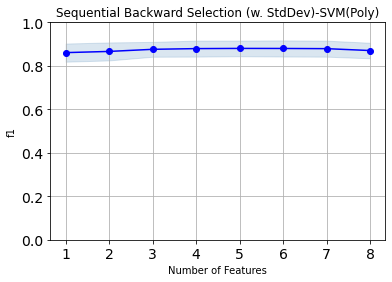

('int_profile_std', 'int_profile_xs_kurt', 'dmsnr_mean', 'dmsnr_std', 'dmsnr_xs_kurt')


In [127]:
fig1 = plot_sfs(sfs_backward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)-SVM(Poly)',fontsize=12)
plt.grid()
plt.show()
print(sfs_backward.k_feature_names_)

In [128]:
poly_back=pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
poly_back.insert(1,"Classifier",SVC(kernel='poly',degree=1))
poly_back.insert(1,"Sequence Direction","Backward")
poly_back

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
5,"(1, 2, 4, 5, 6)",Backward,"SVC(degree=1, kernel='poly')","[0.8527131782945736, 0.8939393939393939, 0.893...",0.880185,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.02675,0.036016,0.012005
6,"(1, 2, 3, 4, 5, 6)",Backward,"SVC(degree=1, kernel='poly')","[0.8437499999999999, 0.8939393939393939, 0.9, ...",0.879927,"(int_profile_std, int_profile_xs_kurt, int_pro...",0.027547,0.037089,0.012363
4,"(1, 2, 4, 5)",Backward,"SVC(degree=1, kernel='poly')","[0.8437499999999999, 0.8939393939393939, 0.893...",0.879289,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.027326,0.036792,0.012264
7,"(1, 2, 3, 4, 5, 6, 7)",Backward,"SVC(degree=1, kernel='poly')","[0.8437499999999999, 0.8939393939393939, 0.9, ...",0.879057,"(int_profile_std, int_profile_xs_kurt, int_pro...",0.027352,0.036827,0.012276
3,"(2, 4, 5)",Backward,"SVC(degree=1, kernel='poly')","[0.8661417322834646, 0.8939393939393939, 0.885...",0.876016,"(int_profile_xs_kurt, dmsnr_mean, dmsnr_std)",0.02537,0.034158,0.011386
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Backward,"SVC(degree=1, kernel='poly')","[0.8412698412698413, 0.8854961832061069, 0.884...",0.870381,"(int_profile_mean, int_profile_std, int_profil...",0.026552,0.035751,0.011917
2,"(2, 5)",Backward,"SVC(degree=1, kernel='poly')","[0.8636363636363635, 0.8721804511278196, 0.877...",0.866327,"(int_profile_xs_kurt, dmsnr_std)",0.030693,0.041325,0.013775
1,"(2,)",Backward,"SVC(degree=1, kernel='poly')","[0.8682170542635659, 0.8702290076335878, 0.884...",0.86083,"(int_profile_xs_kurt,)",0.030998,0.041737,0.013912


We see here that the sequential backward feature selection is more effective with slightly higher average scores. I had to use a degree of 1 as the standard degree of 3 too far too long to run.

#### Sigmoid

In [129]:
sfs_forward = SFS(SVC(kernel='sigmoid'), 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

 
sfs_forward = sfs_forward.fit(X_train, y_train)

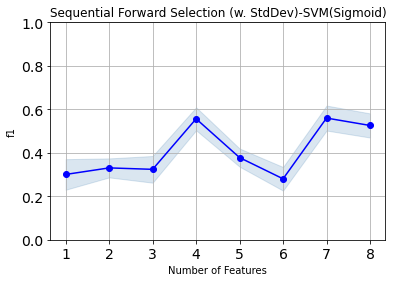

('int_profile_mean', 'int_profile_std', 'int_profile_xs_kurt', 'int_profile_skew', 'dmsnr_mean', 'dmsnr_xs_kurt', 'dmsnr_skew')


In [130]:
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)-SVM(Sigmoid)',fontsize=12)
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

In [131]:
sig_fwd=pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
sig_fwd.insert(1,"Classifier",SVC(kernel='sigmoid'))
sig_fwd.insert(1,"Sequence Direction","Forward")
sig_fwd

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 6, 7)",Forward,SVC(kernel='sigmoid'),"[0.515625, 0.5116279069767443, 0.6119402985074...",0.559877,"(int_profile_mean, int_profile_std, int_profil...",0.042654,0.05743,0.019143
4,"(3, 4, 6, 7)",Forward,SVC(kernel='sigmoid'),"[0.5468750000000001, 0.6081081081081082, 0.597...",0.556393,"(int_profile_skew, dmsnr_mean, dmsnr_xs_kurt, ...",0.039151,0.052714,0.017571
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Forward,SVC(kernel='sigmoid'),"[0.5066666666666666, 0.44295302013422816, 0.54...",0.525797,"(int_profile_mean, int_profile_std, int_profil...",0.041213,0.055489,0.018496
5,"(1, 3, 4, 6, 7)",Forward,SVC(kernel='sigmoid'),"[0.37662337662337664, 0.29577464788732394, 0.4...",0.378057,"(int_profile_std, int_profile_skew, dmsnr_mean...",0.031,0.041739,0.013913
2,"(4, 7)",Forward,SVC(kernel='sigmoid'),"[0.3478260869565218, 0.3150684931506849, 0.302...",0.330681,"(dmsnr_mean, dmsnr_skew)",0.032431,0.043665,0.014555
3,"(3, 4, 7)",Forward,SVC(kernel='sigmoid'),"[0.3125, 0.4113475177304965, 0.299319727891156...",0.32405,"(int_profile_skew, dmsnr_mean, dmsnr_skew)",0.045567,0.061352,0.020451
1,"(4,)",Forward,SVC(kernel='sigmoid'),"[0.18320610687022904, 0.3333333333333333, 0.29...",0.300578,"(dmsnr_mean,)",0.052217,0.070306,0.023435
6,"(0, 1, 3, 4, 6, 7)",Forward,SVC(kernel='sigmoid'),"[0.2463768115942029, 0.2620689655172414, 0.3, ...",0.280489,"(int_profile_mean, int_profile_std, int_profil...",0.040331,0.054302,0.018101


In [132]:
sfs_backward = SFS(SVC(kernel='sigmoid'), 
                  k_features="best", 
                  forward=False, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

 
sfs_backward = sfs_backward.fit(X_train, y_train)

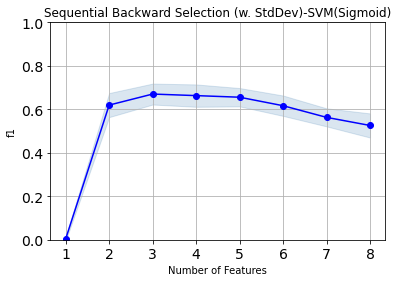

('int_profile_mean', 'int_profile_xs_kurt', 'int_profile_skew')


In [133]:
fig1 = plot_sfs(sfs_backward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)-SVM(Sigmoid)',fontsize=12)
plt.grid()
plt.show()
print(sfs_backward.k_feature_names_)

In [134]:
sig_back=pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
sig_back.insert(1,"Classifier",SVC(kernel='sigmoid'))
sig_back.insert(1,"Sequence Direction","Backward")
sig_back

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3,"(0, 2, 3)",Backward,SVC(kernel='sigmoid'),"[0.6393442622950819, 0.6779661016949153, 0.728...",0.670277,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.035765,0.048154,0.016051
4,"(0, 2, 3, 7)",Backward,SVC(kernel='sigmoid'),"[0.624, 0.6721311475409837, 0.7272727272727272...",0.663119,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.03819,0.05142,0.01714
5,"(0, 2, 3, 4, 7)",Backward,SVC(kernel='sigmoid'),"[0.625, 0.6363636363636364, 0.7000000000000001...",0.655753,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.031306,0.042152,0.014051
2,"(0, 2)",Backward,SVC(kernel='sigmoid'),"[0.607843137254902, 0.5940594059405941, 0.6605...",0.619547,"(int_profile_mean, int_profile_xs_kurt)",0.041073,0.055301,0.018434
6,"(0, 2, 3, 4, 6, 7)",Backward,SVC(kernel='sigmoid'),"[0.5915492957746479, 0.5826771653543307, 0.647...",0.616685,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.034766,0.046809,0.015603
7,"(0, 2, 3, 4, 5, 6, 7)",Backward,SVC(kernel='sigmoid'),"[0.5306122448979592, 0.5569620253164557, 0.554...",0.563097,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.030798,0.041467,0.013822
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Backward,SVC(kernel='sigmoid'),"[0.5066666666666666, 0.44295302013422816, 0.54...",0.525797,"(int_profile_mean, int_profile_std, int_profil...",0.041213,0.055489,0.018496
1,"(0,)",Backward,SVC(kernel='sigmoid'),"[0.02040816326530612, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.004103,"(int_profile_mean,)",0.006094,0.008205,0.002735


We see here that the sequential backward feature selection is more effective with a more significant gap in average scores.

#### rbf

In [135]:
sfs_forward = SFS(SVC(kernel='rbf'), 
                  k_features="best", 
                  forward=True, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)


sfs_forward = sfs_forward.fit(X_train, y_train)

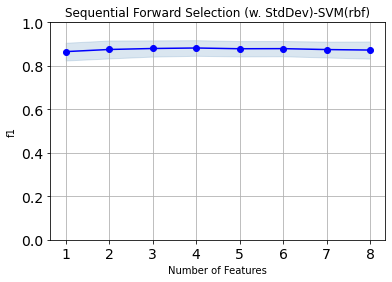

('int_profile_std', 'int_profile_xs_kurt', 'dmsnr_std', 'dmsnr_xs_kurt')


In [136]:
fig1 = plot_sfs(sfs_forward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Forward Selection (w. StdDev)-SVM(rbf)',fontsize=12)
plt.grid()
plt.show()
print(sfs_forward.k_feature_names_)

In [137]:
rbf_fwd=pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
rbf_fwd.insert(1,"Classifier",SVC(kernel='rbf'))
rbf_fwd.insert(1,"Sequence Direction","Forward")
rbf_fwd

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(1, 2, 5, 6)",Forward,SVC(),"[0.876923076923077, 0.8970588235294118, 0.8936...",0.882096,"(int_profile_std, int_profile_xs_kurt, dmsnr_s...",0.026747,0.036012,0.012004
3,"(1, 2, 5)",Forward,SVC(),"[0.8854961832061069, 0.8970588235294118, 0.885...",0.879802,"(int_profile_std, int_profile_xs_kurt, dmsnr_std)",0.027641,0.037217,0.012406
6,"(0, 1, 2, 3, 5, 6)",Forward,SVC(),"[0.876923076923077, 0.9037037037037037, 0.8936...",0.879155,"(int_profile_mean, int_profile_std, int_profil...",0.02604,0.035061,0.011687
5,"(0, 1, 2, 5, 6)",Forward,SVC(),"[0.876923076923077, 0.8970588235294118, 0.8873...",0.878643,"(int_profile_mean, int_profile_std, int_profil...",0.026213,0.035294,0.011765
2,"(2, 5)",Forward,SVC(),"[0.8702290076335878, 0.8888888888888888, 0.893...",0.875272,"(int_profile_xs_kurt, dmsnr_std)",0.030603,0.041204,0.013735
7,"(0, 1, 2, 3, 5, 6, 7)",Forward,SVC(),"[0.8682170542635659, 0.8955223880597014, 0.885...",0.874901,"(int_profile_mean, int_profile_std, int_profil...",0.027088,0.036472,0.012157
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Forward,SVC(),"[0.8412698412698413, 0.8888888888888888, 0.893...",0.872637,"(int_profile_mean, int_profile_std, int_profil...",0.029327,0.039487,0.013162
1,"(2,)",Forward,SVC(),"[0.8702290076335878, 0.8656716417910447, 0.884...",0.865432,"(int_profile_xs_kurt,)",0.030291,0.040784,0.013595


In [138]:
sfs_backward = SFS(SVC(kernel='rbf'), 
                  k_features="best", 
                  forward=False, 
                  floating=False,
                  scoring='f1',
                  cv=10,
                  n_jobs=-1)

 
sfs_backward = sfs_backward.fit(X_train, y_train)

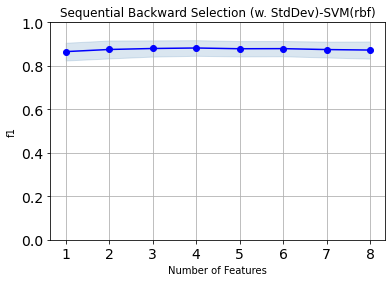

('int_profile_std', 'int_profile_xs_kurt', 'dmsnr_std', 'dmsnr_xs_kurt')


In [139]:
fig1 = plot_sfs(sfs_backward.get_metric_dict(), ylabel='f1')

plt.ylim([0, 1])
plt.title('Sequential Backward Selection (w. StdDev)-SVM(rbf)',fontsize=12)
plt.grid()
plt.show()
print(sfs_backward.k_feature_names_)

In [140]:
rbf_back=pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T.sort_values("avg_score",ascending=False)
rbf_back.insert(1,"Classifier",SVC(kernel='rbf'))
rbf_back.insert(1,"Sequence Direction","Backward")
rbf_back

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(1, 2, 5, 6)",Backward,SVC(),"[0.876923076923077, 0.8970588235294118, 0.8936...",0.882096,"(int_profile_std, int_profile_xs_kurt, dmsnr_s...",0.026747,0.036012,0.012004
3,"(1, 2, 5)",Backward,SVC(),"[0.8854961832061069, 0.8970588235294118, 0.885...",0.879802,"(int_profile_std, int_profile_xs_kurt, dmsnr_std)",0.027641,0.037217,0.012406
6,"(0, 1, 2, 3, 5, 6)",Backward,SVC(),"[0.876923076923077, 0.9037037037037037, 0.8936...",0.879155,"(int_profile_mean, int_profile_std, int_profil...",0.02604,0.035061,0.011687
5,"(0, 1, 2, 5, 6)",Backward,SVC(),"[0.876923076923077, 0.8970588235294118, 0.8873...",0.878643,"(int_profile_mean, int_profile_std, int_profil...",0.026213,0.035294,0.011765
2,"(2, 5)",Backward,SVC(),"[0.8702290076335878, 0.8888888888888888, 0.893...",0.875272,"(int_profile_xs_kurt, dmsnr_std)",0.030603,0.041204,0.013735
7,"(0, 1, 2, 3, 5, 6, 7)",Backward,SVC(),"[0.8682170542635659, 0.8955223880597014, 0.885...",0.874901,"(int_profile_mean, int_profile_std, int_profil...",0.027088,0.036472,0.012157
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Backward,SVC(),"[0.8412698412698413, 0.8888888888888888, 0.893...",0.872637,"(int_profile_mean, int_profile_std, int_profil...",0.029327,0.039487,0.013162
1,"(2,)",Backward,SVC(),"[0.8702290076335878, 0.8656716417910447, 0.884...",0.865432,"(int_profile_xs_kurt,)",0.030291,0.040784,0.013595


We see here that the forward and backward sequential selections behave the same with identical average scores.

In [141]:
best_wrapper = pd.concat([dt_fwd,dt_back,knn_fwd,knn_back,lin_fwd,lin_back,poly_fwd,poly_back,sig_fwd,sig_back,rbf_fwd,rbf_back])
best_wrapper.sort_values("avg_score",ascending=False)
best_wrapper.head(10)

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
6,"(0, 1, 2, 4, 5, 6)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8115942028985507, 0.8843537414965986, 0.842...",0.836277,"(int_profile_mean, int_profile_std, int_profil...",0.021961,0.029569,0.009856
3,"(1, 2, 4)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8175182481751825, 0.861111111111111, 0.8129...",0.835204,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.013635,0.018358,0.006119
8,"(0, 1, 2, 3, 4, 5, 6, 7)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8175182481751825, 0.8590604026845639, 0.818...",0.834634,"(int_profile_mean, int_profile_std, int_profil...",0.024442,0.032909,0.01097
7,"(0, 1, 2, 4, 5, 6, 7)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8208955223880596, 0.8783783783783784, 0.847...",0.832352,"(int_profile_mean, int_profile_std, int_profil...",0.018703,0.025182,0.008394
4,"(1, 2, 4, 6)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.835820895522388, 0.8243243243243243, 0.8104...",0.830435,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.016886,0.022736,0.007579
5,"(1, 2, 4, 5, 6)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8057553956834531, 0.8163265306122449, 0.849...",0.827927,"(int_profile_std, int_profile_xs_kurt, dmsnr_m...",0.019403,0.026125,0.008708
2,"(2, 4)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8120300751879699, 0.8079470198675496, 0.824...",0.814132,"(int_profile_xs_kurt, dmsnr_mean)",0.025174,0.033894,0.011298
1,"(2,)",Forward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8270676691729323, 0.8, 0.7770700636942675, ...",0.80546,"(int_profile_xs_kurt,)",0.03158,0.04252,0.014173
4,"(2, 3, 5, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8382352941176471, 0.8194444444444445, 0.857...",0.84868,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.018199,0.024504,0.008168
5,"(2, 3, 5, 6, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8467153284671534, 0.802721088435374, 0.8724...",0.845625,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.021652,0.029152,0.009717


We can see here that overall, the best classifier for identifying discriminating features using wrapper techniques was the **Decision Tree using the forward sequential selection**.

I anticipated that the SVM Classifier with a polynomial kernel would be the overall best but the run time for it was far too long and would not fully run so I had to use degree of 1 which is less efficient than the standard degree of 3.

My suggestion here is that for SVM, the default kernel(rbf) is better to use as the computaional cost of the polynomial kernel is too large for the required task.

## Task 7

I will now compare the performance of the of the different classifiers using the feature subsets that have been obtained in Tasks 5 and 6. I will then investigate if the results have improved or worsened compared to the results obtained in Task 4.

I expect that this will improve the f1 scores compared to Task 4 as we will bw using the most discriminating features but let's explore:

Firstly, let's remind ourselves of the results obtained in Task 4 on the original dataset.

In [142]:
overall_best, max_score = None, 0
for clf in best_clfs:
    ts = cross_val_score(clf, X_train, y_train, cv=cv, n_jobs=-1, scoring="f1")
    mean = ts.mean()
    if mean > max_score:
        max_score = mean
        overall_best = clf
    print(f"{clf}\nAverage F1: {ts.mean():.3f} +/- {ts.std():.3f}\n-----")
print(f"Overall Best Classifier: {overall_best}") 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=12)
Average F1: 0.889 +/- 0.027
-----
SVC(kernel='poly')
Average F1: 0.891 +/- 0.029
-----
KNeighborsClassifier()
Average F1: 0.868 +/- 0.023
-----
Overall Best Classifier: SVC(kernel='poly')


Now let's look at how the results compared with results obtained in Task 5 using the top 3 most discriminating features in the dataset using filters.

In [143]:
svm_best, max_score = None, 0
clf_name = svc.__class__.__name__
for kernel in ["linear", "poly", "rbf", "sigmoid"]:
    clf = SVC(kernel=kernel)
    scores = cross_val_score(clf, X_train[top_3_features], y_train, cv=cv, scoring="f1", n_jobs=-1)
    mean = scores.mean()
    if mean > max_score:
        max_score = mean
        svm_best = clf
    print(f"{clf}\n{cv}\nAverage F1: {mean:.3f} +/- {scores.std():.3f}\n-----")
print(f"Best: {svm_best}")

SVC(kernel='linear')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.829 +/- 0.023
-----
SVC(kernel='poly')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.879 +/- 0.028
-----
SVC()
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.867 +/- 0.033
-----
SVC(kernel='sigmoid')
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.677 +/- 0.042
-----
Best: SVC(kernel='poly')


We see that for both the SVM Classifier with the polynomial kernel performs the best, with slighty higher f1 scores for the original dataset.

Now let's evaluate the classifiers for the features found using the wrapping technique and see how they perform based on their f1 scores.

### Decision Tree

For Decision Tree I will use the best feature from the backward sequential feature selection as this performed better in Task 6.

In [144]:
dt_back.head(1)

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(2, 3, 5, 7)",Backward,"DecisionTreeClassifier(criterion='entropy', ra...","[0.8382352941176471, 0.8194444444444445, 0.857...",0.84868,"(int_profile_xs_kurt, int_profile_skew, dmsnr_...",0.018199,0.024504,0.008168


In [145]:
dt_winner = list(dt_back["feature_names"][4])

In [146]:
scores = cross_val_score(dt_best, X_train[dt_winner], y_train, cv=cv, scoring="f1", n_jobs=-1)
print(f"{dt_best}\n{cv}\nAverage F1: {scores.mean():.3f} +/- {scores.std():.3f}\n-----")

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       random_state=12)
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.891 +/- 0.028
-----


The Decision Tree performs slightly better here than how it performed on the original dataset.

Let's look at kNN Classifier now. For kNN Classifier I will use the best feature from the forward sequential feature selection as this performed better in Task 6.

### kNN Classifier

In [147]:
knn_fwd.head(1)

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 2, 3, 7)",Forward,KNeighborsClassifier(),"[0.8702290076335878, 0.9130434782608696, 0.881...",0.882927,"(int_profile_mean, int_profile_xs_kurt, int_pr...",0.025721,0.034631,0.011544


In [148]:
knn_winner = list(knn_fwd["feature_names"][4])

In [149]:
scores = cross_val_score(knn_best, X_train[knn_winner], y_train, cv=cv, scoring="f1", n_jobs=-1)
print(f"{knn_best}\n{cv}\nAverage F1: {scores.mean():.3f} +/- {scores.std():.3f}\n-----")

KNeighborsClassifier()
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.883 +/- 0.025
-----


Here also we see the kNN Classifier performs slightly better than its performance on the original dataset.

Finally let's compare the SVM Classifier. I will use rbf as the kernel. Here it is irrelavant whether or not the I used forward or backward as they obtained the same results for Task 6. I'll go with forward sequential selection.

### SVM Classifier

In [150]:
rbf_fwd.head(1)

,feature_idx,Sequence Direction,Classifier,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(1, 2, 5, 6)",Forward,SVC(),"[0.876923076923077, 0.8970588235294118, 0.8936...",0.882096,"(int_profile_std, int_profile_xs_kurt, dmsnr_s...",0.026747,0.036012,0.012004


In [151]:
rbf_winner = list(rbf_fwd["feature_names"][4])

In [152]:
scores = cross_val_score(SVC(kernel='rbf'), X_train[rbf_winner], y_train, cv=cv, scoring="f1", n_jobs=-1)
print(f"{SVC(kernel='rbf')}\n{cv}\nAverage F1: {scores.mean():.3f} +/- {scores.std():.3f}\n-----")

SVC()
StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
Average F1: 0.881 +/- 0.027
-----


Here we see that rbf doesn't performs worse than the best SVM Classifier in Task 4 which was polynomial kernel of degree 3. 

I would expect that had this been compared to polynomial of degree 3 for Task 6 the results may have been different but this wasn't feasible due to the computational cost of polynomial kernels with a degree of 3.

## Task 8 

I will now plot a **Receiver Operating Characteristic(ROC) Curve** for the "1" class and the different classification models used throughout.

In [153]:
best_clfs

[DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                        random_state=12),
 SVC(kernel='poly'),
 KNeighborsClassifier()]

I will create a dummy classifier which will be a baseline .

In [154]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
print(dummy_clf)
print(f"Accuracy of the dummy classifier: " f"{dummy_clf.score(X_test, y_test):.3f}")
print(f"F1: {f1_score(y_test, dummy_clf.predict(X_test)):.3f}")

DummyClassifier(strategy='most_frequent')
Accuracy of the dummy classifier: 0.910
F1: 0.000


The high accuracy value(91%) and the f1 score being zero further highlight the class imbalance that's present in the data.

The area under the ROC Curve is used as the comparitor. The greater the AUC value shows that the classification model has a higher capability of distinguishing between the 0 and 1 target classes.

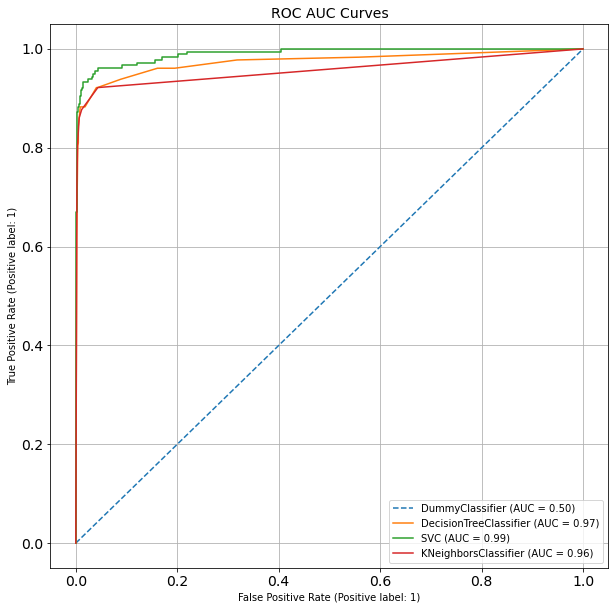

In [155]:
disp = RocCurveDisplay.from_estimator(dummy_clf, X_test, y_test, pos_label=1, linestyle="--")
for clf in best_clfs:
    disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, pos_label=1, ax=disp.ax_)

disp.ax_.grid()
disp.figure_.set_size_inches(10, 10)
disp.ax_.set_title("ROC AUC Curves", fontsize=14);

Looking at the results of my ROC Curve, we see that the SVM Classifier with a polynomial kernel of degree 3 had the highest area under the curve with an AUC of 0.99. This is extremely close to perfection showing that this classifier has a fantastic ability to accurately distinguish between the 0 and 1 target classes.

Based on the evaluation done throughout the assignment, it's clear to see that the **SVM Classifier is the best suited for the classification dataset for pulsar stars.**